In [1]:
from deep_rl import *
import matplotlib.pyplot as plt
import torch
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

/network/home/penmetss/DeepRL/deeprl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/network/home/penmetss/DeepRL/deeprl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/network/home/penmetss/DeepRL/deeprl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/network/home/penmetss/DeepRL/deeprl/lib

In [2]:
def dsr_feature(**kwargs):
    generate_tag(kwargs)
    kwargs.setdefault('log_level', 0)
    config = Config()
    config.merge(kwargs)

    config.task_fn = lambda: Task(config.game)
    config.eval_env = config.task_fn()
    config.c = 0.1

    config.optimizer_fn = lambda params: torch.optim.RMSprop(params, 0.001)
    config.network_fn = lambda: SRNet(config.action_dim, FCBody(config.state_dim))
    # config.network_fn = lambda: DuelingNet(config.action_dim, FCBody(config.state_dim))
    # config.replay_fn = lambda: Replay(memory_size=int(1e4), batch_size=10)
    config.replay_fn = lambda: AsyncReplay(memory_size=int(1e4), batch_size=10)

    config.random_action_prob = LinearSchedule(1.0, 0.1, 1e4)
    config.discount = 0.99
    config.target_network_update_freq = 200
    config.exploration_steps = 1000
    # config.double_q = True
    config.double_q = False
    config.sgd_update_frequency = 4
    config.gradient_clip = 5
    config.eval_interval = int(5e3)
    config.max_steps = 1e5
    config.async_actor = False
    run_steps(DSRAgent(config))
    
# DQN
def dqn_feature(**kwargs):
    generate_tag(kwargs)
    kwargs.setdefault('log_level', 0)
    config = Config()
    config.merge(kwargs)

    config.task_fn = lambda: Task(config.game)
    config.eval_env = config.task_fn()

    config.optimizer_fn = lambda params: torch.optim.RMSprop(params, 0.001)
    config.network_fn = lambda: VanillaNet(config.action_dim, FCBody(config.state_dim))
    # config.network_fn = lambda: DuelingNet(config.action_dim, FCBody(config.state_dim))
    # config.replay_fn = lambda: Replay(memory_size=int(1e4), batch_size=10)
    config.replay_fn = lambda: AsyncReplay(memory_size=int(1e4), batch_size=10)

    config.random_action_prob = LinearSchedule(1.0, 0.1, 1e4)
    config.discount = 0.99
    config.target_network_update_freq = 200
    config.exploration_steps = 1000
    # config.double_q = True
    config.double_q = False
    config.sgd_update_frequency = 4
    config.gradient_clip = 5
    config.eval_interval = int(5e3)
    config.max_steps = 1e5
    config.async_actor = False
    run_steps(DQNAgent(config))

In [3]:
mkdir('log')
mkdir('tf_log')
set_one_thread()
random_seed()
select_device(-1)

In [4]:
game = 'FourRooms'
dsr_feature(game=game)

2020-03-02 13:12:24,073 - root - INFO: steps 0, 349525333.33 steps/s
2020-03-02 13:12:24,736 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-03-02 13:12:24,968 - root - INFO: steps 143, episodic_return_train -143
2020-03-02 13:12:25,055 - root - INFO: steps 343, episodic_return_train -200
2020-03-02 13:12:25,062 - root - INFO: steps 352, episodic_return_train -8
2020-03-02 13:12:25,071 - root - INFO: steps 372, episodic_return_train -19
2020-03-02 13:12:25,157 - root - INFO: steps 572, episodic_return_train -200
2020-03-02 13:12:25,161 - root - INFO: steps 582, episodic_return_train -9
2020-03-02 13:12:25,245 - root - INFO: steps 777, episodic_return_train -194
2020-03-02 13:12:25,298 - root - INFO: steps 899, episodic_return_train -121
2020-03-02 13:12:25,341 - root - INFO: steps 1000, 790.42 steps/s
2020-03-02 13:12:25,515 - root - INFO: steps 1099, episodic_return_train -200
2020-03-02 13:12:25,850 - root - INFO: steps 1299, episodic_return_train -200
2020-03-02 13:1

2020-03-02 13:12:43,110 - root - INFO: steps 10966, episodic_return_train -200
2020-03-02 13:12:43,118 - root - INFO: steps 10971, episodic_return_train -4
2020-03-02 13:12:43,169 - root - INFO: steps 11000, 477.67 steps/s
2020-03-02 13:12:43,450 - root - INFO: steps 11171, episodic_return_train -200
2020-03-02 13:12:43,457 - root - INFO: steps 11175, episodic_return_train -3
2020-03-02 13:12:43,798 - root - INFO: steps 11375, episodic_return_train -200
2020-03-02 13:12:43,813 - root - INFO: steps 11382, episodic_return_train -6
2020-03-02 13:12:44,145 - root - INFO: steps 11582, episodic_return_train -200
2020-03-02 13:12:44,158 - root - INFO: steps 11586, episodic_return_train -3
2020-03-02 13:12:44,245 - root - INFO: steps 11637, episodic_return_train -50
2020-03-02 13:12:44,266 - root - INFO: steps 11651, episodic_return_train -13
2020-03-02 13:12:44,608 - root - INFO: steps 11851, episodic_return_train -200
2020-03-02 13:12:44,636 - root - INFO: steps 11867, episodic_return_train 

2020-03-02 13:12:53,352 - root - INFO: steps 16802, episodic_return_train -15
2020-03-02 13:12:53,388 - root - INFO: steps 16827, episodic_return_train -24
2020-03-02 13:12:53,468 - root - INFO: steps 16875, episodic_return_train -47
2020-03-02 13:12:53,559 - root - INFO: steps 16926, episodic_return_train -50
2020-03-02 13:12:53,606 - root - INFO: steps 16952, episodic_return_train -25
2020-03-02 13:12:53,620 - root - INFO: steps 16960, episodic_return_train -7
2020-03-02 13:12:53,642 - root - INFO: steps 16973, episodic_return_train -12
2020-03-02 13:12:53,651 - root - INFO: steps 16977, episodic_return_train -3
2020-03-02 13:12:53,665 - root - INFO: steps 16985, episodic_return_train -7
2020-03-02 13:12:53,680 - root - INFO: steps 16994, episodic_return_train -8
2020-03-02 13:12:53,693 - root - INFO: steps 17000, 590.67 steps/s
2020-03-02 13:12:53,832 - root - INFO: steps 17080, episodic_return_train -85
2020-03-02 13:12:53,873 - root - INFO: steps 17105, episodic_return_train -24
2

2020-03-02 13:12:59,337 - root - INFO: steps 20260, episodic_return_train -7
2020-03-02 13:12:59,447 - root - INFO: steps 20325, episodic_return_train -64
2020-03-02 13:12:59,514 - root - INFO: steps 20366, episodic_return_train -40
2020-03-02 13:12:59,559 - root - INFO: steps 20393, episodic_return_train -26
2020-03-02 13:12:59,579 - root - INFO: steps 20407, episodic_return_train -13
2020-03-02 13:12:59,654 - root - INFO: steps 20449, episodic_return_train -41
2020-03-02 13:12:59,675 - root - INFO: steps 20460, episodic_return_train -10
2020-03-02 13:12:59,683 - root - INFO: steps 20466, episodic_return_train -5
2020-03-02 13:12:59,698 - root - INFO: steps 20474, episodic_return_train -7
2020-03-02 13:12:59,720 - root - INFO: steps 20486, episodic_return_train -11
2020-03-02 13:12:59,728 - root - INFO: steps 20488, episodic_return_train -1
2020-03-02 13:12:59,747 - root - INFO: steps 20499, episodic_return_train -10
2020-03-02 13:12:59,809 - root - INFO: steps 20534, episodic_return_

2020-03-02 13:13:03,277 - root - INFO: steps 22545, episodic_return_train -9
2020-03-02 13:13:03,334 - root - INFO: steps 22576, episodic_return_train -30
2020-03-02 13:13:03,335 - root - INFO: steps 22579, episodic_return_train -2
2020-03-02 13:13:03,370 - root - INFO: steps 22602, episodic_return_train -22
2020-03-02 13:13:03,407 - root - INFO: steps 22624, episodic_return_train -21
2020-03-02 13:13:03,453 - root - INFO: steps 22653, episodic_return_train -28
2020-03-02 13:13:03,521 - root - INFO: steps 22694, episodic_return_train -40
2020-03-02 13:13:03,550 - root - INFO: steps 22711, episodic_return_train -16
2020-03-02 13:13:03,577 - root - INFO: steps 22724, episodic_return_train -12
2020-03-02 13:13:03,585 - root - INFO: steps 22728, episodic_return_train -3
2020-03-02 13:13:03,610 - root - INFO: steps 22747, episodic_return_train -18
2020-03-02 13:13:03,715 - root - INFO: steps 22808, episodic_return_train -60
2020-03-02 13:13:03,737 - root - INFO: steps 22820, episodic_return

2020-03-02 13:13:07,143 - root - INFO: steps 24804, episodic_return_train -19
2020-03-02 13:13:07,144 - root - INFO: steps 24806, episodic_return_train -1
2020-03-02 13:13:07,197 - root - INFO: steps 24838, episodic_return_train -31
2020-03-02 13:13:07,234 - root - INFO: steps 24859, episodic_return_train -20
2020-03-02 13:13:07,268 - root - INFO: steps 24879, episodic_return_train -19
2020-03-02 13:13:07,313 - root - INFO: steps 24902, episodic_return_train -22
2020-03-02 13:13:07,348 - root - INFO: steps 24923, episodic_return_train -20
2020-03-02 13:13:07,364 - root - INFO: steps 24929, episodic_return_train -5
2020-03-02 13:13:07,429 - root - INFO: steps 24964, episodic_return_train -34
2020-03-02 13:13:07,452 - root - INFO: steps 24979, episodic_return_train -14
2020-03-02 13:13:07,493 - root - INFO: steps 25000, 566.95 steps/s
2020-03-02 13:13:07,808 - root - INFO: steps 25000, episodic_return_test -91.70(28.19)
2020-03-02 13:13:07,892 - root - INFO: steps 25049, episodic_return_

2020-03-02 13:13:10,583 - root - INFO: steps 26582, episodic_return_train -10
2020-03-02 13:13:10,597 - root - INFO: steps 26591, episodic_return_train -8
2020-03-02 13:13:10,618 - root - INFO: steps 26602, episodic_return_train -10
2020-03-02 13:13:10,631 - root - INFO: steps 26609, episodic_return_train -6
2020-03-02 13:13:10,659 - root - INFO: steps 26627, episodic_return_train -17
2020-03-02 13:13:10,748 - root - INFO: steps 26677, episodic_return_train -49
2020-03-02 13:13:10,775 - root - INFO: steps 26694, episodic_return_train -16
2020-03-02 13:13:10,782 - root - INFO: steps 26698, episodic_return_train -3
2020-03-02 13:13:10,817 - root - INFO: steps 26716, episodic_return_train -17
2020-03-02 13:13:10,819 - root - INFO: steps 26717, episodic_return_train 0
2020-03-02 13:13:10,847 - root - INFO: steps 26735, episodic_return_train -17
2020-03-02 13:13:10,918 - root - INFO: steps 26773, episodic_return_train -37
2020-03-02 13:13:10,933 - root - INFO: steps 26782, episodic_return_t

2020-03-02 13:13:13,832 - root - INFO: steps 28428, episodic_return_train -27
2020-03-02 13:13:13,841 - root - INFO: steps 28432, episodic_return_train -3
2020-03-02 13:13:13,884 - root - INFO: steps 28456, episodic_return_train -23
2020-03-02 13:13:13,940 - root - INFO: steps 28491, episodic_return_train -34
2020-03-02 13:13:13,999 - root - INFO: steps 28520, episodic_return_train -28
2020-03-02 13:13:14,030 - root - INFO: steps 28537, episodic_return_train -16
2020-03-02 13:13:14,089 - root - INFO: steps 28569, episodic_return_train -31
2020-03-02 13:13:14,104 - root - INFO: steps 28576, episodic_return_train -6
2020-03-02 13:13:14,126 - root - INFO: steps 28588, episodic_return_train -11
2020-03-02 13:13:14,142 - root - INFO: steps 28598, episodic_return_train -9
2020-03-02 13:13:14,173 - root - INFO: steps 28613, episodic_return_train -14
2020-03-02 13:13:14,180 - root - INFO: steps 28616, episodic_return_train -2
2020-03-02 13:13:14,188 - root - INFO: steps 28621, episodic_return_

2020-03-02 13:13:16,961 - root - INFO: steps 30039, episodic_return_train -4
2020-03-02 13:13:16,981 - root - INFO: steps 30048, episodic_return_train -8
2020-03-02 13:13:17,016 - root - INFO: steps 30069, episodic_return_train -20
2020-03-02 13:13:17,044 - root - INFO: steps 30087, episodic_return_train -17
2020-03-02 13:13:17,070 - root - INFO: steps 30100, episodic_return_train -12
2020-03-02 13:13:17,122 - root - INFO: steps 30129, episodic_return_train -28
2020-03-02 13:13:17,157 - root - INFO: steps 30147, episodic_return_train -17
2020-03-02 13:13:17,164 - root - INFO: steps 30150, episodic_return_train -2
2020-03-02 13:13:17,197 - root - INFO: steps 30164, episodic_return_train -13
2020-03-02 13:13:17,242 - root - INFO: steps 30191, episodic_return_train -26
2020-03-02 13:13:17,285 - root - INFO: steps 30215, episodic_return_train -23
2020-03-02 13:13:17,308 - root - INFO: steps 30225, episodic_return_train -9
2020-03-02 13:13:17,338 - root - INFO: steps 30243, episodic_return_

2020-03-02 13:13:20,919 - root - INFO: steps 32173, episodic_return_train -13
2020-03-02 13:13:20,951 - root - INFO: steps 32188, episodic_return_train -14
2020-03-02 13:13:21,045 - root - INFO: steps 32238, episodic_return_train -49
2020-03-02 13:13:21,053 - root - INFO: steps 32241, episodic_return_train -2
2020-03-02 13:13:21,083 - root - INFO: steps 32259, episodic_return_train -17
2020-03-02 13:13:21,091 - root - INFO: steps 32263, episodic_return_train -3
2020-03-02 13:13:21,101 - root - INFO: steps 32265, episodic_return_train -1
2020-03-02 13:13:21,126 - root - INFO: steps 32279, episodic_return_train -13
2020-03-02 13:13:21,166 - root - INFO: steps 32299, episodic_return_train -19
2020-03-02 13:13:21,199 - root - INFO: steps 32312, episodic_return_train -12
2020-03-02 13:13:21,209 - root - INFO: steps 32319, episodic_return_train -6
2020-03-02 13:13:21,218 - root - INFO: steps 32321, episodic_return_train -1
2020-03-02 13:13:21,236 - root - INFO: steps 32330, episodic_return_t

2020-03-02 13:13:24,456 - root - INFO: steps 34022, episodic_return_train -4
2020-03-02 13:13:24,499 - root - INFO: steps 34045, episodic_return_train -22
2020-03-02 13:13:24,521 - root - INFO: steps 34058, episodic_return_train -12
2020-03-02 13:13:24,543 - root - INFO: steps 34070, episodic_return_train -11
2020-03-02 13:13:24,551 - root - INFO: steps 34073, episodic_return_train -2
2020-03-02 13:13:24,579 - root - INFO: steps 34089, episodic_return_train -15
2020-03-02 13:13:24,622 - root - INFO: steps 34113, episodic_return_train -23
2020-03-02 13:13:24,673 - root - INFO: steps 34141, episodic_return_train -27
2020-03-02 13:13:24,695 - root - INFO: steps 34155, episodic_return_train -13
2020-03-02 13:13:24,710 - root - INFO: steps 34161, episodic_return_train -5
2020-03-02 13:13:24,734 - root - INFO: steps 34175, episodic_return_train -13
2020-03-02 13:13:24,743 - root - INFO: steps 34179, episodic_return_train -3
2020-03-02 13:13:24,757 - root - INFO: steps 34184, episodic_return_

2020-03-02 13:13:27,626 - root - INFO: steps 35664, episodic_return_train -2
2020-03-02 13:13:27,635 - root - INFO: steps 35670, episodic_return_train -5
2020-03-02 13:13:27,651 - root - INFO: steps 35676, episodic_return_train -5
2020-03-02 13:13:27,666 - root - INFO: steps 35687, episodic_return_train -10
2020-03-02 13:13:27,700 - root - INFO: steps 35707, episodic_return_train -19
2020-03-02 13:13:27,708 - root - INFO: steps 35711, episodic_return_train -3
2020-03-02 13:13:27,769 - root - INFO: steps 35742, episodic_return_train -30
2020-03-02 13:13:27,816 - root - INFO: steps 35766, episodic_return_train -23
2020-03-02 13:13:27,824 - root - INFO: steps 35769, episodic_return_train -2
2020-03-02 13:13:27,846 - root - INFO: steps 35780, episodic_return_train -10
2020-03-02 13:13:27,884 - root - INFO: steps 35802, episodic_return_train -21
2020-03-02 13:13:27,915 - root - INFO: steps 35818, episodic_return_train -15
2020-03-02 13:13:27,969 - root - INFO: steps 35845, episodic_return_t

2020-03-02 13:13:31,241 - root - INFO: steps 37523, episodic_return_train -56
2020-03-02 13:13:31,266 - root - INFO: steps 37532, episodic_return_train -8
2020-03-02 13:13:31,275 - root - INFO: steps 37538, episodic_return_train -5
2020-03-02 13:13:31,410 - root - INFO: steps 37608, episodic_return_train -69
2020-03-02 13:13:31,419 - root - INFO: steps 37614, episodic_return_train -5
2020-03-02 13:13:31,444 - root - INFO: steps 37626, episodic_return_train -11
2020-03-02 13:13:31,492 - root - INFO: steps 37651, episodic_return_train -24
2020-03-02 13:13:31,518 - root - INFO: steps 37663, episodic_return_train -11
2020-03-02 13:13:31,559 - root - INFO: steps 37682, episodic_return_train -18
2020-03-02 13:13:31,575 - root - INFO: steps 37690, episodic_return_train -7
2020-03-02 13:13:31,603 - root - INFO: steps 37706, episodic_return_train -15
2020-03-02 13:13:31,620 - root - INFO: steps 37712, episodic_return_train -5
2020-03-02 13:13:31,645 - root - INFO: steps 37726, episodic_return_t

2020-03-02 13:13:34,745 - root - INFO: steps 39291, episodic_return_train -1
2020-03-02 13:13:34,769 - root - INFO: steps 39302, episodic_return_train -10
2020-03-02 13:13:34,778 - root - INFO: steps 39307, episodic_return_train -4
2020-03-02 13:13:34,818 - root - INFO: steps 39325, episodic_return_train -17
2020-03-02 13:13:34,843 - root - INFO: steps 39336, episodic_return_train -10
2020-03-02 13:13:34,853 - root - INFO: steps 39341, episodic_return_train -4
2020-03-02 13:13:34,894 - root - INFO: steps 39363, episodic_return_train -21
2020-03-02 13:13:34,912 - root - INFO: steps 39371, episodic_return_train -7
2020-03-02 13:13:34,929 - root - INFO: steps 39377, episodic_return_train -5
2020-03-02 13:13:34,947 - root - INFO: steps 39386, episodic_return_train -8
2020-03-02 13:13:34,956 - root - INFO: steps 39389, episodic_return_train -2
2020-03-02 13:13:34,965 - root - INFO: steps 39394, episodic_return_train -4
2020-03-02 13:13:34,997 - root - INFO: steps 39411, episodic_return_trai

2020-03-02 13:13:38,114 - root - INFO: steps 40996, episodic_return_train 0
2020-03-02 13:13:38,120 - root - INFO: steps 41000, 504.09 steps/s
2020-03-02 13:13:38,202 - root - INFO: steps 41045, episodic_return_train -48
2020-03-02 13:13:38,263 - root - INFO: steps 41077, episodic_return_train -31
2020-03-02 13:13:38,325 - root - INFO: steps 41108, episodic_return_train -30
2020-03-02 13:13:38,365 - root - INFO: steps 41129, episodic_return_train -20
2020-03-02 13:13:38,387 - root - INFO: steps 41142, episodic_return_train -12
2020-03-02 13:13:38,416 - root - INFO: steps 41159, episodic_return_train -16
2020-03-02 13:13:38,431 - root - INFO: steps 41166, episodic_return_train -6
2020-03-02 13:13:38,454 - root - INFO: steps 41178, episodic_return_train -11
2020-03-02 13:13:38,497 - root - INFO: steps 41201, episodic_return_train -22
2020-03-02 13:13:38,527 - root - INFO: steps 41219, episodic_return_train -17
2020-03-02 13:13:38,565 - root - INFO: steps 41237, episodic_return_train -17


2020-03-02 13:13:41,471 - root - INFO: steps 42726, episodic_return_train -21
2020-03-02 13:13:41,521 - root - INFO: steps 42751, episodic_return_train -24
2020-03-02 13:13:41,555 - root - INFO: steps 42767, episodic_return_train -15
2020-03-02 13:13:41,601 - root - INFO: steps 42790, episodic_return_train -22
2020-03-02 13:13:41,636 - root - INFO: steps 42811, episodic_return_train -20
2020-03-02 13:13:41,645 - root - INFO: steps 42813, episodic_return_train -1
2020-03-02 13:13:41,662 - root - INFO: steps 42823, episodic_return_train -9
2020-03-02 13:13:41,688 - root - INFO: steps 42833, episodic_return_train -9
2020-03-02 13:13:41,698 - root - INFO: steps 42838, episodic_return_train -4
2020-03-02 13:13:41,780 - root - INFO: steps 42878, episodic_return_train -39
2020-03-02 13:13:41,822 - root - INFO: steps 42899, episodic_return_train -20
2020-03-02 13:13:41,840 - root - INFO: steps 42907, episodic_return_train -7
2020-03-02 13:13:41,868 - root - INFO: steps 42916, episodic_return_t

2020-03-02 13:13:44,929 - root - INFO: steps 44448, episodic_return_train -26
2020-03-02 13:13:44,973 - root - INFO: steps 44472, episodic_return_train -23
2020-03-02 13:13:45,008 - root - INFO: steps 44492, episodic_return_train -19
2020-03-02 13:13:45,009 - root - INFO: steps 44494, episodic_return_train -1
2020-03-02 13:13:45,182 - root - INFO: steps 44590, episodic_return_train -95
2020-03-02 13:13:45,191 - root - INFO: steps 44594, episodic_return_train -3
2020-03-02 13:13:45,228 - root - INFO: steps 44612, episodic_return_train -17
2020-03-02 13:13:45,236 - root - INFO: steps 44616, episodic_return_train -3
2020-03-02 13:13:45,292 - root - INFO: steps 44649, episodic_return_train -32
2020-03-02 13:13:45,361 - root - INFO: steps 44688, episodic_return_train -38
2020-03-02 13:13:45,384 - root - INFO: steps 44700, episodic_return_train -11
2020-03-02 13:13:45,495 - root - INFO: steps 44765, episodic_return_train -64
2020-03-02 13:13:45,505 - root - INFO: steps 44769, episodic_return

2020-03-02 13:13:49,081 - root - INFO: steps 46393, episodic_return_train -12
2020-03-02 13:13:49,115 - root - INFO: steps 46410, episodic_return_train -16
2020-03-02 13:13:49,123 - root - INFO: steps 46415, episodic_return_train -4
2020-03-02 13:13:49,162 - root - INFO: steps 46432, episodic_return_train -16
2020-03-02 13:13:49,171 - root - INFO: steps 46439, episodic_return_train -6
2020-03-02 13:13:49,224 - root - INFO: steps 46466, episodic_return_train -26
2020-03-02 13:13:49,280 - root - INFO: steps 46494, episodic_return_train -27
2020-03-02 13:13:49,341 - root - INFO: steps 46526, episodic_return_train -31
2020-03-02 13:13:49,374 - root - INFO: steps 46541, episodic_return_train -14
2020-03-02 13:13:49,395 - root - INFO: steps 46552, episodic_return_train -10
2020-03-02 13:13:49,432 - root - INFO: steps 46572, episodic_return_train -19
2020-03-02 13:13:49,476 - root - INFO: steps 46599, episodic_return_train -26
2020-03-02 13:13:49,513 - root - INFO: steps 46617, episodic_retur

2020-03-02 13:13:52,442 - root - INFO: steps 48074, episodic_return_train -9
2020-03-02 13:13:52,471 - root - INFO: steps 48088, episodic_return_train -13
2020-03-02 13:13:52,513 - root - INFO: steps 48115, episodic_return_train -26
2020-03-02 13:13:52,527 - root - INFO: steps 48122, episodic_return_train -6
2020-03-02 13:13:52,550 - root - INFO: steps 48133, episodic_return_train -10
2020-03-02 13:13:52,622 - root - INFO: steps 48172, episodic_return_train -38
2020-03-02 13:13:52,645 - root - INFO: steps 48184, episodic_return_train -11
2020-03-02 13:13:52,675 - root - INFO: steps 48201, episodic_return_train -16
2020-03-02 13:13:52,704 - root - INFO: steps 48217, episodic_return_train -15
2020-03-02 13:13:52,720 - root - INFO: steps 48227, episodic_return_train -9
2020-03-02 13:13:52,751 - root - INFO: steps 48241, episodic_return_train -13
2020-03-02 13:13:52,761 - root - INFO: steps 48246, episodic_return_train -4
2020-03-02 13:13:52,785 - root - INFO: steps 48258, episodic_return_

2020-03-02 13:13:55,769 - root - INFO: steps 49736, episodic_return_train -12
2020-03-02 13:13:55,787 - root - INFO: steps 49744, episodic_return_train -7
2020-03-02 13:13:55,834 - root - INFO: steps 49769, episodic_return_train -24
2020-03-02 13:13:55,891 - root - INFO: steps 49798, episodic_return_train -28
2020-03-02 13:13:55,909 - root - INFO: steps 49804, episodic_return_train -5
2020-03-02 13:13:55,926 - root - INFO: steps 49815, episodic_return_train -10
2020-03-02 13:13:55,934 - root - INFO: steps 49817, episodic_return_train -1
2020-03-02 13:13:55,942 - root - INFO: steps 49823, episodic_return_train -5
2020-03-02 13:13:55,965 - root - INFO: steps 49835, episodic_return_train -11
2020-03-02 13:13:55,981 - root - INFO: steps 49842, episodic_return_train -6
2020-03-02 13:13:56,005 - root - INFO: steps 49852, episodic_return_train -9
2020-03-02 13:13:56,029 - root - INFO: steps 49864, episodic_return_train -11
2020-03-02 13:13:56,037 - root - INFO: steps 49871, episodic_return_tr

2020-03-02 13:13:58,847 - root - INFO: steps 51281, episodic_return_train -22
2020-03-02 13:13:58,937 - root - INFO: steps 51325, episodic_return_train -43
2020-03-02 13:13:58,969 - root - INFO: steps 51341, episodic_return_train -15
2020-03-02 13:13:59,003 - root - INFO: steps 51358, episodic_return_train -16
2020-03-02 13:13:59,036 - root - INFO: steps 51373, episodic_return_train -14
2020-03-02 13:13:59,061 - root - INFO: steps 51384, episodic_return_train -10
2020-03-02 13:13:59,077 - root - INFO: steps 51395, episodic_return_train -10
2020-03-02 13:13:59,108 - root - INFO: steps 51409, episodic_return_train -13
2020-03-02 13:13:59,117 - root - INFO: steps 51412, episodic_return_train -2
2020-03-02 13:13:59,140 - root - INFO: steps 51424, episodic_return_train -11
2020-03-02 13:13:59,156 - root - INFO: steps 51435, episodic_return_train -10
2020-03-02 13:13:59,180 - root - INFO: steps 51444, episodic_return_train -8
2020-03-02 13:13:59,203 - root - INFO: steps 51457, episodic_retur

2020-03-02 13:14:02,147 - root - INFO: steps 52914, episodic_return_train -10
2020-03-02 13:14:02,179 - root - INFO: steps 52930, episodic_return_train -15
2020-03-02 13:14:02,195 - root - INFO: steps 52937, episodic_return_train -6
2020-03-02 13:14:02,203 - root - INFO: steps 52940, episodic_return_train -2
2020-03-02 13:14:02,241 - root - INFO: steps 52961, episodic_return_train -20
2020-03-02 13:14:02,250 - root - INFO: steps 52967, episodic_return_train -5
2020-03-02 13:14:02,274 - root - INFO: steps 52976, episodic_return_train -8
2020-03-02 13:14:02,283 - root - INFO: steps 52981, episodic_return_train -4
2020-03-02 13:14:02,313 - root - INFO: steps 52997, episodic_return_train -15
2020-03-02 13:14:02,320 - root - INFO: steps 53000, 504.43 steps/s
2020-03-02 13:14:02,382 - root - INFO: steps 53034, episodic_return_train -36
2020-03-02 13:14:02,430 - root - INFO: steps 53059, episodic_return_train -24
2020-03-02 13:14:02,438 - root - INFO: steps 53062, episodic_return_train -2
202

2020-03-02 13:14:05,614 - root - INFO: steps 54625, episodic_return_train -30
2020-03-02 13:14:05,648 - root - INFO: steps 54642, episodic_return_train -16
2020-03-02 13:14:05,658 - root - INFO: steps 54646, episodic_return_train -3
2020-03-02 13:14:05,692 - root - INFO: steps 54660, episodic_return_train -13
2020-03-02 13:14:05,719 - root - INFO: steps 54673, episodic_return_train -12
2020-03-02 13:14:05,745 - root - INFO: steps 54685, episodic_return_train -11
2020-03-02 13:14:05,774 - root - INFO: steps 54701, episodic_return_train -15
2020-03-02 13:14:05,815 - root - INFO: steps 54723, episodic_return_train -21
2020-03-02 13:14:05,826 - root - INFO: steps 54727, episodic_return_train -3
2020-03-02 13:14:05,845 - root - INFO: steps 54733, episodic_return_train -5
2020-03-02 13:14:05,856 - root - INFO: steps 54739, episodic_return_train -5
2020-03-02 13:14:05,900 - root - INFO: steps 54756, episodic_return_train -16
2020-03-02 13:14:05,927 - root - INFO: steps 54768, episodic_return_

2020-03-02 13:14:08,786 - root - INFO: steps 56151, episodic_return_train -5
2020-03-02 13:14:08,812 - root - INFO: steps 56162, episodic_return_train -10
2020-03-02 13:14:08,830 - root - INFO: steps 56171, episodic_return_train -8
2020-03-02 13:14:08,846 - root - INFO: steps 56177, episodic_return_train -5
2020-03-02 13:14:08,856 - root - INFO: steps 56181, episodic_return_train -3
2020-03-02 13:14:08,872 - root - INFO: steps 56189, episodic_return_train -7
2020-03-02 13:14:08,873 - root - INFO: steps 56191, episodic_return_train -1
2020-03-02 13:14:08,882 - root - INFO: steps 56194, episodic_return_train -2
2020-03-02 13:14:08,912 - root - INFO: steps 56210, episodic_return_train -15
2020-03-02 13:14:08,935 - root - INFO: steps 56222, episodic_return_train -11
2020-03-02 13:14:08,936 - root - INFO: steps 56223, episodic_return_train 0
2020-03-02 13:14:08,967 - root - INFO: steps 56239, episodic_return_train -15
2020-03-02 13:14:08,991 - root - INFO: steps 56249, episodic_return_train

2020-03-02 13:14:11,903 - root - INFO: steps 57662, episodic_return_train 0
2020-03-02 13:14:11,912 - root - INFO: steps 57666, episodic_return_train -3
2020-03-02 13:14:11,938 - root - INFO: steps 57678, episodic_return_train -11
2020-03-02 13:14:12,186 - root - INFO: steps 57801, episodic_return_train -122
2020-03-02 13:14:12,195 - root - INFO: steps 57806, episodic_return_train -4
2020-03-02 13:14:12,229 - root - INFO: steps 57823, episodic_return_train -16
2020-03-02 13:14:12,247 - root - INFO: steps 57829, episodic_return_train -5
2020-03-02 13:14:12,265 - root - INFO: steps 57839, episodic_return_train -9
2020-03-02 13:14:12,290 - root - INFO: steps 57851, episodic_return_train -11
2020-03-02 13:14:12,347 - root - INFO: steps 57877, episodic_return_train -25
2020-03-02 13:14:12,396 - root - INFO: steps 57903, episodic_return_train -25
2020-03-02 13:14:12,410 - root - INFO: steps 57907, episodic_return_train -3
2020-03-02 13:14:12,456 - root - INFO: steps 57929, episodic_return_tr

2020-03-02 13:14:15,263 - root - INFO: steps 59293, episodic_return_train -5
2020-03-02 13:14:15,279 - root - INFO: steps 59303, episodic_return_train -9
2020-03-02 13:14:15,308 - root - INFO: steps 59319, episodic_return_train -15
2020-03-02 13:14:15,324 - root - INFO: steps 59325, episodic_return_train -5
2020-03-02 13:14:15,354 - root - INFO: steps 59341, episodic_return_train -15
2020-03-02 13:14:15,378 - root - INFO: steps 59352, episodic_return_train -10
2020-03-02 13:14:15,379 - root - INFO: steps 59355, episodic_return_train -2
2020-03-02 13:14:15,395 - root - INFO: steps 59360, episodic_return_train -4
2020-03-02 13:14:15,412 - root - INFO: steps 59370, episodic_return_train -9
2020-03-02 13:14:15,443 - root - INFO: steps 59384, episodic_return_train -13
2020-03-02 13:14:15,467 - root - INFO: steps 59399, episodic_return_train -14
2020-03-02 13:14:15,498 - root - INFO: steps 59415, episodic_return_train -15
2020-03-02 13:14:15,506 - root - INFO: steps 59418, episodic_return_tr

2020-03-02 13:14:18,272 - root - INFO: steps 60725, episodic_return_train -13
2020-03-02 13:14:18,303 - root - INFO: steps 60742, episodic_return_train -16
2020-03-02 13:14:18,327 - root - INFO: steps 60754, episodic_return_train -11
2020-03-02 13:14:18,368 - root - INFO: steps 60773, episodic_return_train -18
2020-03-02 13:14:18,386 - root - INFO: steps 60781, episodic_return_train -7
2020-03-02 13:14:18,417 - root - INFO: steps 60797, episodic_return_train -15
2020-03-02 13:14:18,447 - root - INFO: steps 60814, episodic_return_train -16
2020-03-02 13:14:18,485 - root - INFO: steps 60833, episodic_return_train -18
2020-03-02 13:14:18,500 - root - INFO: steps 60840, episodic_return_train -6
2020-03-02 13:14:18,531 - root - INFO: steps 60859, episodic_return_train -18
2020-03-02 13:14:18,547 - root - INFO: steps 60865, episodic_return_train -5
2020-03-02 13:14:18,565 - root - INFO: steps 60875, episodic_return_train -9
2020-03-02 13:14:18,573 - root - INFO: steps 60877, episodic_return_

2020-03-02 13:14:21,704 - root - INFO: steps 62424, episodic_return_train -12
2020-03-02 13:14:21,721 - root - INFO: steps 62434, episodic_return_train -9
2020-03-02 13:14:21,753 - root - INFO: steps 62448, episodic_return_train -13
2020-03-02 13:14:21,777 - root - INFO: steps 62460, episodic_return_train -11
2020-03-02 13:14:21,801 - root - INFO: steps 62473, episodic_return_train -12
2020-03-02 13:14:21,825 - root - INFO: steps 62485, episodic_return_train -11
2020-03-02 13:14:21,851 - root - INFO: steps 62499, episodic_return_train -13
2020-03-02 13:14:21,867 - root - INFO: steps 62504, episodic_return_train -4
2020-03-02 13:14:21,882 - root - INFO: steps 62514, episodic_return_train -9
2020-03-02 13:14:21,906 - root - INFO: steps 62527, episodic_return_train -12
2020-03-02 13:14:21,921 - root - INFO: steps 62532, episodic_return_train -4
2020-03-02 13:14:21,938 - root - INFO: steps 62540, episodic_return_train -7
2020-03-02 13:14:21,954 - root - INFO: steps 62549, episodic_return_t

2020-03-02 13:14:24,752 - root - INFO: steps 63928, episodic_return_train -18
2020-03-02 13:14:24,769 - root - INFO: steps 63936, episodic_return_train -7
2020-03-02 13:14:24,811 - root - INFO: steps 63963, episodic_return_train -26
2020-03-02 13:14:24,834 - root - INFO: steps 63972, episodic_return_train -8
2020-03-02 13:14:24,879 - root - INFO: steps 63993, episodic_return_train -20
2020-03-02 13:14:24,899 - root - INFO: steps 64000, 497.09 steps/s
2020-03-02 13:14:24,909 - root - INFO: steps 64004, episodic_return_train -10
2020-03-02 13:14:24,910 - root - INFO: steps 64006, episodic_return_train -1
2020-03-02 13:14:24,929 - root - INFO: steps 64012, episodic_return_train -5
2020-03-02 13:14:24,964 - root - INFO: steps 64030, episodic_return_train -17
2020-03-02 13:14:25,017 - root - INFO: steps 64053, episodic_return_train -22
2020-03-02 13:14:25,041 - root - INFO: steps 64065, episodic_return_train -11
2020-03-02 13:14:25,121 - root - INFO: steps 64106, episodic_return_train -40
2

2020-03-02 13:14:27,993 - root - INFO: steps 65480, episodic_return_train -20
2020-03-02 13:14:28,033 - root - INFO: steps 65503, episodic_return_train -22
2020-03-02 13:14:28,042 - root - INFO: steps 65507, episodic_return_train -3
2020-03-02 13:14:28,050 - root - INFO: steps 65510, episodic_return_train -2
2020-03-02 13:14:28,073 - root - INFO: steps 65522, episodic_return_train -11
2020-03-02 13:14:28,088 - root - INFO: steps 65528, episodic_return_train -5
2020-03-02 13:14:28,140 - root - INFO: steps 65558, episodic_return_train -29
2020-03-02 13:14:28,148 - root - INFO: steps 65563, episodic_return_train -4
2020-03-02 13:14:28,177 - root - INFO: steps 65579, episodic_return_train -15
2020-03-02 13:14:28,200 - root - INFO: steps 65589, episodic_return_train -9
2020-03-02 13:14:28,208 - root - INFO: steps 65593, episodic_return_train -3
2020-03-02 13:14:28,216 - root - INFO: steps 65597, episodic_return_train -3
2020-03-02 13:14:28,246 - root - INFO: steps 65613, episodic_return_tra

2020-03-02 13:14:30,784 - root - INFO: steps 66895, episodic_return_train -13
2020-03-02 13:14:30,794 - root - INFO: steps 66897, episodic_return_train -1
2020-03-02 13:14:30,812 - root - INFO: steps 66907, episodic_return_train -9
2020-03-02 13:14:30,821 - root - INFO: steps 66911, episodic_return_train -3
2020-03-02 13:14:30,836 - root - INFO: steps 66919, episodic_return_train -7
2020-03-02 13:14:30,853 - root - INFO: steps 66927, episodic_return_train -7
2020-03-02 13:14:30,862 - root - INFO: steps 66930, episodic_return_train -2
2020-03-02 13:14:30,871 - root - INFO: steps 66935, episodic_return_train -4
2020-03-02 13:14:30,889 - root - INFO: steps 66943, episodic_return_train -7
2020-03-02 13:14:30,906 - root - INFO: steps 66951, episodic_return_train -7
2020-03-02 13:14:30,922 - root - INFO: steps 66959, episodic_return_train -7
2020-03-02 13:14:30,931 - root - INFO: steps 66961, episodic_return_train -1
2020-03-02 13:14:30,959 - root - INFO: steps 66972, episodic_return_train -

2020-03-02 13:14:33,907 - root - INFO: steps 68430, episodic_return_train -1
2020-03-02 13:14:33,952 - root - INFO: steps 68452, episodic_return_train -21
2020-03-02 13:14:33,953 - root - INFO: steps 68455, episodic_return_train -2
2020-03-02 13:14:33,978 - root - INFO: steps 68467, episodic_return_train -11
2020-03-02 13:14:34,033 - root - INFO: steps 68491, episodic_return_train -23
2020-03-02 13:14:34,044 - root - INFO: steps 68494, episodic_return_train -2
2020-03-02 13:14:34,053 - root - INFO: steps 68497, episodic_return_train -2
2020-03-02 13:14:34,062 - root - INFO: steps 68501, episodic_return_train -3
2020-03-02 13:14:34,086 - root - INFO: steps 68514, episodic_return_train -12
2020-03-02 13:14:34,135 - root - INFO: steps 68536, episodic_return_train -21
2020-03-02 13:14:34,176 - root - INFO: steps 68558, episodic_return_train -21
2020-03-02 13:14:34,194 - root - INFO: steps 68567, episodic_return_train -8
2020-03-02 13:14:34,204 - root - INFO: steps 68569, episodic_return_tr

2020-03-02 13:14:36,885 - root - INFO: steps 69890, episodic_return_train -25
2020-03-02 13:14:36,902 - root - INFO: steps 69899, episodic_return_train -8
2020-03-02 13:14:36,926 - root - INFO: steps 69911, episodic_return_train -11
2020-03-02 13:14:36,949 - root - INFO: steps 69922, episodic_return_train -10
2020-03-02 13:14:36,995 - root - INFO: steps 69947, episodic_return_train -24
2020-03-02 13:14:37,013 - root - INFO: steps 69953, episodic_return_train -5
2020-03-02 13:14:37,063 - root - INFO: steps 69978, episodic_return_train -24
2020-03-02 13:14:37,094 - root - INFO: steps 69993, episodic_return_train -14
2020-03-02 13:14:37,109 - root - INFO: steps 70000, 495.81 steps/s
2020-03-02 13:14:37,142 - root - INFO: steps 70000, episodic_return_test -7.30(1.54)
2020-03-02 13:14:37,174 - root - INFO: steps 70017, episodic_return_train -23
2020-03-02 13:14:37,183 - root - INFO: steps 70021, episodic_return_train -3
2020-03-02 13:14:37,232 - root - INFO: steps 70045, episodic_return_tra

2020-03-02 13:14:39,601 - root - INFO: steps 71166, episodic_return_train -4
2020-03-02 13:14:39,630 - root - INFO: steps 71180, episodic_return_train -13
2020-03-02 13:14:39,683 - root - INFO: steps 71209, episodic_return_train -28
2020-03-02 13:14:39,709 - root - INFO: steps 71222, episodic_return_train -12
2020-03-02 13:14:39,727 - root - INFO: steps 71228, episodic_return_train -5
2020-03-02 13:14:39,740 - root - INFO: steps 71235, episodic_return_train -6
2020-03-02 13:14:39,802 - root - INFO: steps 71265, episodic_return_train -29
2020-03-02 13:14:39,841 - root - INFO: steps 71285, episodic_return_train -19
2020-03-02 13:14:39,901 - root - INFO: steps 71316, episodic_return_train -30
2020-03-02 13:14:39,942 - root - INFO: steps 71338, episodic_return_train -21
2020-03-02 13:14:39,975 - root - INFO: steps 71355, episodic_return_train -16
2020-03-02 13:14:39,997 - root - INFO: steps 71364, episodic_return_train -8
2020-03-02 13:14:40,021 - root - INFO: steps 71377, episodic_return_

2020-03-02 13:14:42,773 - root - INFO: steps 72707, episodic_return_train -20
2020-03-02 13:14:42,803 - root - INFO: steps 72717, episodic_return_train -9
2020-03-02 13:14:42,857 - root - INFO: steps 72747, episodic_return_train -29
2020-03-02 13:14:42,866 - root - INFO: steps 72749, episodic_return_train -1
2020-03-02 13:14:42,891 - root - INFO: steps 72762, episodic_return_train -12
2020-03-02 13:14:42,900 - root - INFO: steps 72766, episodic_return_train -3
2020-03-02 13:14:42,951 - root - INFO: steps 72789, episodic_return_train -22
2020-03-02 13:14:42,961 - root - INFO: steps 72792, episodic_return_train -2
2020-03-02 13:14:43,067 - root - INFO: steps 72846, episodic_return_train -53
2020-03-02 13:14:43,129 - root - INFO: steps 72875, episodic_return_train -28
2020-03-02 13:14:43,155 - root - INFO: steps 72885, episodic_return_train -9
2020-03-02 13:14:43,188 - root - INFO: steps 72903, episodic_return_train -17
2020-03-02 13:14:43,226 - root - INFO: steps 72921, episodic_return_t

2020-03-02 13:14:45,838 - root - INFO: steps 74193, episodic_return_train -2
2020-03-02 13:14:45,881 - root - INFO: steps 74212, episodic_return_train -18
2020-03-02 13:14:45,891 - root - INFO: steps 74218, episodic_return_train -5
2020-03-02 13:14:45,927 - root - INFO: steps 74233, episodic_return_train -14
2020-03-02 13:14:45,936 - root - INFO: steps 74239, episodic_return_train -5
2020-03-02 13:14:45,999 - root - INFO: steps 74269, episodic_return_train -29
2020-03-02 13:14:46,031 - root - INFO: steps 74287, episodic_return_train -17
2020-03-02 13:14:46,073 - root - INFO: steps 74306, episodic_return_train -18
2020-03-02 13:14:46,107 - root - INFO: steps 74322, episodic_return_train -15
2020-03-02 13:14:46,150 - root - INFO: steps 74343, episodic_return_train -20
2020-03-02 13:14:46,191 - root - INFO: steps 74362, episodic_return_train -18
2020-03-02 13:14:46,218 - root - INFO: steps 74372, episodic_return_train -9
2020-03-02 13:14:46,253 - root - INFO: steps 74391, episodic_return_

2020-03-02 13:14:49,318 - root - INFO: steps 75844, episodic_return_train -14
2020-03-02 13:14:49,334 - root - INFO: steps 75852, episodic_return_train -7
2020-03-02 13:14:49,342 - root - INFO: steps 75856, episodic_return_train -3
2020-03-02 13:14:49,387 - root - INFO: steps 75883, episodic_return_train -26
2020-03-02 13:14:49,442 - root - INFO: steps 75909, episodic_return_train -25
2020-03-02 13:14:49,451 - root - INFO: steps 75912, episodic_return_train -2
2020-03-02 13:14:49,452 - root - INFO: steps 75915, episodic_return_train -2
2020-03-02 13:14:49,460 - root - INFO: steps 75919, episodic_return_train -3
2020-03-02 13:14:49,506 - root - INFO: steps 75942, episodic_return_train -22
2020-03-02 13:14:49,523 - root - INFO: steps 75950, episodic_return_train -7
2020-03-02 13:14:49,546 - root - INFO: steps 75963, episodic_return_train -12
2020-03-02 13:14:49,577 - root - INFO: steps 75978, episodic_return_train -14
2020-03-02 13:14:49,585 - root - INFO: steps 75981, episodic_return_tr

2020-03-02 13:14:52,507 - root - INFO: steps 77447, episodic_return_train -7
2020-03-02 13:14:52,645 - root - INFO: steps 77514, episodic_return_train -66
2020-03-02 13:14:52,728 - root - INFO: steps 77553, episodic_return_train -38
2020-03-02 13:14:52,745 - root - INFO: steps 77560, episodic_return_train -6
2020-03-02 13:14:52,771 - root - INFO: steps 77573, episodic_return_train -12
2020-03-02 13:14:52,789 - root - INFO: steps 77581, episodic_return_train -7
2020-03-02 13:14:52,816 - root - INFO: steps 77595, episodic_return_train -13
2020-03-02 13:14:52,932 - root - INFO: steps 77651, episodic_return_train -55
2020-03-02 13:14:52,959 - root - INFO: steps 77662, episodic_return_train -10
2020-03-02 13:14:53,001 - root - INFO: steps 77682, episodic_return_train -19
2020-03-02 13:14:53,049 - root - INFO: steps 77700, episodic_return_train -17
2020-03-02 13:14:53,114 - root - INFO: steps 77729, episodic_return_train -28
2020-03-02 13:14:53,133 - root - INFO: steps 77737, episodic_return

2020-03-02 13:14:55,901 - root - INFO: steps 79122, episodic_return_train -2
2020-03-02 13:14:55,932 - root - INFO: steps 79136, episodic_return_train -13
2020-03-02 13:14:55,941 - root - INFO: steps 79143, episodic_return_train -6
2020-03-02 13:14:55,987 - root - INFO: steps 79164, episodic_return_train -20
2020-03-02 13:14:56,035 - root - INFO: steps 79189, episodic_return_train -24
2020-03-02 13:14:56,091 - root - INFO: steps 79219, episodic_return_train -29
2020-03-02 13:14:56,154 - root - INFO: steps 79251, episodic_return_train -31
2020-03-02 13:14:56,203 - root - INFO: steps 79273, episodic_return_train -21
2020-03-02 13:14:56,238 - root - INFO: steps 79291, episodic_return_train -17
2020-03-02 13:14:56,297 - root - INFO: steps 79316, episodic_return_train -24
2020-03-02 13:14:56,298 - root - INFO: steps 79319, episodic_return_train -2
2020-03-02 13:14:56,356 - root - INFO: steps 79346, episodic_return_train -26
2020-03-02 13:14:56,410 - root - INFO: steps 79371, episodic_return

2020-03-02 13:14:58,975 - root - INFO: steps 80589, episodic_return_train -11
2020-03-02 13:14:58,983 - root - INFO: steps 80594, episodic_return_train -4
2020-03-02 13:14:59,010 - root - INFO: steps 80606, episodic_return_train -11
2020-03-02 13:14:59,056 - root - INFO: steps 80629, episodic_return_train -22
2020-03-02 13:14:59,125 - root - INFO: steps 80667, episodic_return_train -37
2020-03-02 13:14:59,142 - root - INFO: steps 80675, episodic_return_train -7
2020-03-02 13:14:59,183 - root - INFO: steps 80694, episodic_return_train -18
2020-03-02 13:14:59,241 - root - INFO: steps 80720, episodic_return_train -25
2020-03-02 13:14:59,258 - root - INFO: steps 80729, episodic_return_train -8
2020-03-02 13:14:59,276 - root - INFO: steps 80736, episodic_return_train -6
2020-03-02 13:14:59,292 - root - INFO: steps 80744, episodic_return_train -7
2020-03-02 13:14:59,293 - root - INFO: steps 80746, episodic_return_train -1
2020-03-02 13:14:59,301 - root - INFO: steps 80750, episodic_return_tr

2020-03-02 13:15:02,027 - root - INFO: steps 82053, episodic_return_train -17
2020-03-02 13:15:02,059 - root - INFO: steps 82070, episodic_return_train -16
2020-03-02 13:15:02,067 - root - INFO: steps 82075, episodic_return_train -4
2020-03-02 13:15:02,105 - root - INFO: steps 82092, episodic_return_train -16
2020-03-02 13:15:02,146 - root - INFO: steps 82112, episodic_return_train -19
2020-03-02 13:15:02,162 - root - INFO: steps 82121, episodic_return_train -8
2020-03-02 13:15:02,170 - root - INFO: steps 82125, episodic_return_train -3
2020-03-02 13:15:02,193 - root - INFO: steps 82137, episodic_return_train -11
2020-03-02 13:15:02,208 - root - INFO: steps 82146, episodic_return_train -8
2020-03-02 13:15:02,217 - root - INFO: steps 82149, episodic_return_train -2
2020-03-02 13:15:02,255 - root - INFO: steps 82168, episodic_return_train -18
2020-03-02 13:15:02,271 - root - INFO: steps 82176, episodic_return_train -7
2020-03-02 13:15:02,337 - root - INFO: steps 82215, episodic_return_tr

2020-03-02 13:15:05,686 - root - INFO: steps 83809, episodic_return_train -3
2020-03-02 13:15:05,720 - root - INFO: steps 83826, episodic_return_train -16
2020-03-02 13:15:05,781 - root - INFO: steps 83853, episodic_return_train -26
2020-03-02 13:15:05,806 - root - INFO: steps 83866, episodic_return_train -12
2020-03-02 13:15:05,840 - root - INFO: steps 83883, episodic_return_train -16
2020-03-02 13:15:05,872 - root - INFO: steps 83896, episodic_return_train -12
2020-03-02 13:15:05,888 - root - INFO: steps 83905, episodic_return_train -8
2020-03-02 13:15:05,904 - root - INFO: steps 83912, episodic_return_train -6
2020-03-02 13:15:05,967 - root - INFO: steps 83944, episodic_return_train -31
2020-03-02 13:15:06,051 - root - INFO: steps 83985, episodic_return_train -40
2020-03-02 13:15:06,061 - root - INFO: steps 83989, episodic_return_train -3
2020-03-02 13:15:06,085 - root - INFO: steps 84000, 476.86 steps/s
2020-03-02 13:15:06,088 - root - INFO: steps 84003, episodic_return_train -13
2

2020-03-02 13:15:09,092 - root - INFO: steps 85397, episodic_return_train -12
2020-03-02 13:15:09,115 - root - INFO: steps 85408, episodic_return_train -10
2020-03-02 13:15:09,147 - root - INFO: steps 85426, episodic_return_train -17
2020-03-02 13:15:09,214 - root - INFO: steps 85457, episodic_return_train -30
2020-03-02 13:15:09,248 - root - INFO: steps 85475, episodic_return_train -17
2020-03-02 13:15:09,258 - root - INFO: steps 85479, episodic_return_train -3
2020-03-02 13:15:09,276 - root - INFO: steps 85487, episodic_return_train -7
2020-03-02 13:15:09,292 - root - INFO: steps 85494, episodic_return_train -6
2020-03-02 13:15:09,316 - root - INFO: steps 85506, episodic_return_train -11
2020-03-02 13:15:09,367 - root - INFO: steps 85529, episodic_return_train -22
2020-03-02 13:15:09,382 - root - INFO: steps 85534, episodic_return_train -4
2020-03-02 13:15:09,416 - root - INFO: steps 85551, episodic_return_train -16
2020-03-02 13:15:09,476 - root - INFO: steps 85579, episodic_return_

2020-03-02 13:15:12,422 - root - INFO: steps 87005, episodic_return_train -33
2020-03-02 13:15:12,452 - root - INFO: steps 87022, episodic_return_train -16
2020-03-02 13:15:12,491 - root - INFO: steps 87042, episodic_return_train -19
2020-03-02 13:15:12,500 - root - INFO: steps 87044, episodic_return_train -1
2020-03-02 13:15:12,510 - root - INFO: steps 87048, episodic_return_train -3
2020-03-02 13:15:12,518 - root - INFO: steps 87052, episodic_return_train -3
2020-03-02 13:15:12,575 - root - INFO: steps 87080, episodic_return_train -27
2020-03-02 13:15:12,576 - root - INFO: steps 87082, episodic_return_train -1
2020-03-02 13:15:12,600 - root - INFO: steps 87093, episodic_return_train -10
2020-03-02 13:15:12,653 - root - INFO: steps 87121, episodic_return_train -27
2020-03-02 13:15:12,677 - root - INFO: steps 87132, episodic_return_train -10
2020-03-02 13:15:12,725 - root - INFO: steps 87157, episodic_return_train -24
2020-03-02 13:15:12,748 - root - INFO: steps 87166, episodic_return_

2020-03-02 13:15:15,678 - root - INFO: steps 88593, episodic_return_train -10
2020-03-02 13:15:15,717 - root - INFO: steps 88613, episodic_return_train -19
2020-03-02 13:15:15,768 - root - INFO: steps 88639, episodic_return_train -25
2020-03-02 13:15:15,778 - root - INFO: steps 88642, episodic_return_train -2
2020-03-02 13:15:15,801 - root - INFO: steps 88655, episodic_return_train -12
2020-03-02 13:15:15,839 - root - INFO: steps 88675, episodic_return_train -19
2020-03-02 13:15:15,862 - root - INFO: steps 88685, episodic_return_train -9
2020-03-02 13:15:15,894 - root - INFO: steps 88700, episodic_return_train -14
2020-03-02 13:15:15,903 - root - INFO: steps 88707, episodic_return_train -6
2020-03-02 13:15:15,933 - root - INFO: steps 88723, episodic_return_train -15
2020-03-02 13:15:15,963 - root - INFO: steps 88738, episodic_return_train -14
2020-03-02 13:15:15,971 - root - INFO: steps 88742, episodic_return_train -3
2020-03-02 13:15:16,017 - root - INFO: steps 88767, episodic_return_

2020-03-02 13:15:18,587 - root - INFO: steps 90000, 479.76 steps/s
2020-03-02 13:15:18,641 - root - INFO: steps 90000, episodic_return_test -12.70(2.88)
2020-03-02 13:15:18,667 - root - INFO: steps 90015, episodic_return_train -15
2020-03-02 13:15:18,675 - root - INFO: steps 90017, episodic_return_train -1
2020-03-02 13:15:18,676 - root - INFO: steps 90018, episodic_return_train 0
2020-03-02 13:15:18,696 - root - INFO: steps 90026, episodic_return_train -7
2020-03-02 13:15:18,748 - root - INFO: steps 90045, episodic_return_train -18
2020-03-02 13:15:18,757 - root - INFO: steps 90050, episodic_return_train -4
2020-03-02 13:15:18,766 - root - INFO: steps 90052, episodic_return_train -1
2020-03-02 13:15:18,798 - root - INFO: steps 90069, episodic_return_train -16
2020-03-02 13:15:18,824 - root - INFO: steps 90081, episodic_return_train -11
2020-03-02 13:15:18,844 - root - INFO: steps 90088, episodic_return_train -6
2020-03-02 13:15:18,854 - root - INFO: steps 90093, episodic_return_train 

2020-03-02 13:15:21,765 - root - INFO: steps 91539, episodic_return_train -10
2020-03-02 13:15:21,830 - root - INFO: steps 91567, episodic_return_train -27
2020-03-02 13:15:21,917 - root - INFO: steps 91609, episodic_return_train -41
2020-03-02 13:15:21,933 - root - INFO: steps 91616, episodic_return_train -6
2020-03-02 13:15:21,972 - root - INFO: steps 91639, episodic_return_train -22
2020-03-02 13:15:22,036 - root - INFO: steps 91671, episodic_return_train -31
2020-03-02 13:15:22,069 - root - INFO: steps 91685, episodic_return_train -13
2020-03-02 13:15:22,101 - root - INFO: steps 91701, episodic_return_train -15
2020-03-02 13:15:22,157 - root - INFO: steps 91731, episodic_return_train -29
2020-03-02 13:15:22,166 - root - INFO: steps 91734, episodic_return_train -2
2020-03-02 13:15:22,221 - root - INFO: steps 91762, episodic_return_train -27
2020-03-02 13:15:22,230 - root - INFO: steps 91766, episodic_return_train -3
2020-03-02 13:15:22,260 - root - INFO: steps 91780, episodic_return

2020-03-02 13:15:25,020 - root - INFO: steps 93116, episodic_return_train -28
2020-03-02 13:15:25,055 - root - INFO: steps 93132, episodic_return_train -15
2020-03-02 13:15:25,090 - root - INFO: steps 93149, episodic_return_train -16
2020-03-02 13:15:25,123 - root - INFO: steps 93162, episodic_return_train -12
2020-03-02 13:15:25,139 - root - INFO: steps 93169, episodic_return_train -6
2020-03-02 13:15:25,155 - root - INFO: steps 93179, episodic_return_train -9
2020-03-02 13:15:25,217 - root - INFO: steps 93204, episodic_return_train -24
2020-03-02 13:15:25,290 - root - INFO: steps 93237, episodic_return_train -32
2020-03-02 13:15:25,330 - root - INFO: steps 93256, episodic_return_train -18
2020-03-02 13:15:25,331 - root - INFO: steps 93259, episodic_return_train -2
2020-03-02 13:15:25,379 - root - INFO: steps 93283, episodic_return_train -23
2020-03-02 13:15:25,436 - root - INFO: steps 93311, episodic_return_train -27
2020-03-02 13:15:25,500 - root - INFO: steps 93338, episodic_return

2020-03-02 13:15:28,498 - root - INFO: steps 94802, episodic_return_train -1
2020-03-02 13:15:28,509 - root - INFO: steps 94807, episodic_return_train -4
2020-03-02 13:15:28,533 - root - INFO: steps 94817, episodic_return_train -9
2020-03-02 13:15:28,558 - root - INFO: steps 94831, episodic_return_train -13
2020-03-02 13:15:28,675 - root - INFO: steps 94884, episodic_return_train -52
2020-03-02 13:15:28,708 - root - INFO: steps 94902, episodic_return_train -17
2020-03-02 13:15:28,717 - root - INFO: steps 94907, episodic_return_train -4
2020-03-02 13:15:28,754 - root - INFO: steps 94922, episodic_return_train -14
2020-03-02 13:15:28,801 - root - INFO: steps 94944, episodic_return_train -21
2020-03-02 13:15:28,824 - root - INFO: steps 94956, episodic_return_train -11
2020-03-02 13:15:28,841 - root - INFO: steps 94965, episodic_return_train -8
2020-03-02 13:15:28,909 - root - INFO: steps 95000, 490.72 steps/s
2020-03-02 13:15:28,937 - root - INFO: steps 95000, episodic_return_test -6.00(0

2020-03-02 13:15:32,212 - root - INFO: steps 96581, episodic_return_train -20
2020-03-02 13:15:32,244 - root - INFO: steps 96597, episodic_return_train -15
2020-03-02 13:15:32,283 - root - INFO: steps 96619, episodic_return_train -21
2020-03-02 13:15:32,308 - root - INFO: steps 96629, episodic_return_train -9
2020-03-02 13:15:32,309 - root - INFO: steps 96631, episodic_return_train -1
2020-03-02 13:15:32,325 - root - INFO: steps 96639, episodic_return_train -7
2020-03-02 13:15:32,341 - root - INFO: steps 96645, episodic_return_train -5
2020-03-02 13:15:32,404 - root - INFO: steps 96678, episodic_return_train -32
2020-03-02 13:15:32,438 - root - INFO: steps 96692, episodic_return_train -13
2020-03-02 13:15:32,469 - root - INFO: steps 96710, episodic_return_train -17
2020-03-02 13:15:32,495 - root - INFO: steps 96723, episodic_return_train -12
2020-03-02 13:15:32,578 - root - INFO: steps 96765, episodic_return_train -41
2020-03-02 13:15:32,594 - root - INFO: steps 96773, episodic_return_

2020-03-02 13:15:35,138 - root - INFO: steps 98011, episodic_return_train -1
2020-03-02 13:15:35,198 - root - INFO: steps 98039, episodic_return_train -27
2020-03-02 13:15:35,217 - root - INFO: steps 98044, episodic_return_train -4
2020-03-02 13:15:35,281 - root - INFO: steps 98072, episodic_return_train -27
2020-03-02 13:15:35,325 - root - INFO: steps 98094, episodic_return_train -21
2020-03-02 13:15:35,357 - root - INFO: steps 98110, episodic_return_train -15
2020-03-02 13:15:35,381 - root - INFO: steps 98120, episodic_return_train -9
2020-03-02 13:15:35,423 - root - INFO: steps 98140, episodic_return_train -19
2020-03-02 13:15:35,481 - root - INFO: steps 98170, episodic_return_train -29
2020-03-02 13:15:35,490 - root - INFO: steps 98172, episodic_return_train -1
2020-03-02 13:15:35,492 - root - INFO: steps 98173, episodic_return_train 0
2020-03-02 13:15:35,516 - root - INFO: steps 98187, episodic_return_train -13
2020-03-02 13:15:35,532 - root - INFO: steps 98192, episodic_return_tr

2020-03-02 13:15:38,585 - root - INFO: steps 99706, episodic_return_train -13
2020-03-02 13:15:38,593 - root - INFO: steps 99708, episodic_return_train -1
2020-03-02 13:15:38,648 - root - INFO: steps 99737, episodic_return_train -28
2020-03-02 13:15:38,657 - root - INFO: steps 99742, episodic_return_train -4
2020-03-02 13:15:38,665 - root - INFO: steps 99745, episodic_return_train -2
2020-03-02 13:15:38,703 - root - INFO: steps 99764, episodic_return_train -18
2020-03-02 13:15:38,711 - root - INFO: steps 99770, episodic_return_train -5
2020-03-02 13:15:38,784 - root - INFO: steps 99805, episodic_return_train -34
2020-03-02 13:15:38,801 - root - INFO: steps 99813, episodic_return_train -7
2020-03-02 13:15:38,857 - root - INFO: steps 99841, episodic_return_train -27
2020-03-02 13:15:38,900 - root - INFO: steps 99860, episodic_return_train -18
2020-03-02 13:15:38,932 - root - INFO: steps 99878, episodic_return_train -17
2020-03-02 13:15:38,949 - root - INFO: steps 99886, episodic_return_t

In [24]:
game = 'FourRooms'
dqn_feature(game=game)

2020-03-01 16:33:58,531 - root - INFO: steps 0, 91180521.74 steps/s
2020-03-01 16:33:58,861 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-03-01 16:33:58,929 - root - INFO: steps 199, episodic_return_train -200
2020-03-01 16:33:58,979 - root - INFO: steps 399, episodic_return_train -200
2020-03-01 16:33:59,030 - root - INFO: steps 599, episodic_return_train -200
2020-03-01 16:33:59,090 - root - INFO: steps 799, episodic_return_train -200
2020-03-01 16:33:59,144 - root - INFO: steps 999, episodic_return_train -200
2020-03-01 16:33:59,146 - root - INFO: steps 1000, 1639.31 steps/s
2020-03-01 16:33:59,217 - root - INFO: steps 1068, episodic_return_train -68
2020-03-01 16:33:59,250 - root - INFO: steps 1104, episodic_return_train -35
2020-03-01 16:33:59,360 - root - INFO: steps 1233, episodic_return_train -128
2020-03-01 16:33:59,514 - root - INFO: steps 1433, episodic_return_train -200
2020-03-01 16:33:59,678 - root - INFO: steps 1633, episodic_return_train -200
2020-03-0

2020-03-01 16:34:07,326 - root - INFO: steps 10390, episodic_return_train 0
2020-03-01 16:34:07,334 - root - INFO: steps 10396, episodic_return_train -5
2020-03-01 16:34:07,338 - root - INFO: steps 10400, episodic_return_train -3
2020-03-01 16:34:07,496 - root - INFO: steps 10600, episodic_return_train -200
2020-03-01 16:34:07,646 - root - INFO: steps 10800, episodic_return_train -200
2020-03-01 16:34:07,665 - root - INFO: steps 10823, episodic_return_train -22
2020-03-01 16:34:07,676 - root - INFO: steps 10828, episodic_return_train -4
2020-03-01 16:34:07,698 - root - INFO: steps 10855, episodic_return_train -26
2020-03-01 16:34:07,802 - root - INFO: steps 11000, 965.24 steps/s
2020-03-01 16:34:07,840 - root - INFO: steps 11055, episodic_return_train -200
2020-03-01 16:34:07,938 - root - INFO: steps 11194, episodic_return_train -138
2020-03-01 16:34:08,079 - root - INFO: steps 11363, episodic_return_train -168
2020-03-01 16:34:08,149 - root - INFO: steps 11445, episodic_return_train -

2020-03-01 16:34:12,239 - root - INFO: steps 16106, episodic_return_train -18
2020-03-01 16:34:12,391 - root - INFO: steps 16306, episodic_return_train -200
2020-03-01 16:34:12,447 - root - INFO: steps 16379, episodic_return_train -72
2020-03-01 16:34:12,460 - root - INFO: steps 16393, episodic_return_train -13
2020-03-01 16:34:12,470 - root - INFO: steps 16404, episodic_return_train -10
2020-03-01 16:34:12,477 - root - INFO: steps 16412, episodic_return_train -7
2020-03-01 16:34:12,558 - root - INFO: steps 16511, episodic_return_train -98
2020-03-01 16:34:12,566 - root - INFO: steps 16518, episodic_return_train -6
2020-03-01 16:34:12,635 - root - INFO: steps 16607, episodic_return_train -88
2020-03-01 16:34:12,656 - root - INFO: steps 16628, episodic_return_train -20
2020-03-01 16:34:12,743 - root - INFO: steps 16739, episodic_return_train -110
2020-03-01 16:34:12,751 - root - INFO: steps 16747, episodic_return_train -7
2020-03-01 16:34:12,827 - root - INFO: steps 16842, episodic_retu

2020-03-01 16:34:14,888 - root - INFO: steps 19288, episodic_return_train -21
2020-03-01 16:34:14,914 - root - INFO: steps 19320, episodic_return_train -31
2020-03-01 16:34:14,932 - root - INFO: steps 19340, episodic_return_train -19
2020-03-01 16:34:15,007 - root - INFO: steps 19439, episodic_return_train -98
2020-03-01 16:34:15,015 - root - INFO: steps 19445, episodic_return_train -5
2020-03-01 16:34:15,020 - root - INFO: steps 19448, episodic_return_train -2
2020-03-01 16:34:15,051 - root - INFO: steps 19485, episodic_return_train -36
2020-03-01 16:34:15,059 - root - INFO: steps 19493, episodic_return_train -7
2020-03-01 16:34:15,067 - root - INFO: steps 19500, episodic_return_train -6
2020-03-01 16:34:15,090 - root - INFO: steps 19530, episodic_return_train -29
2020-03-01 16:34:15,114 - root - INFO: steps 19556, episodic_return_train -25
2020-03-01 16:34:15,124 - root - INFO: steps 19567, episodic_return_train -10
2020-03-01 16:34:15,149 - root - INFO: steps 19585, episodic_return_

2020-03-01 16:34:16,415 - root - INFO: steps 20895, episodic_return_train -9
2020-03-01 16:34:16,458 - root - INFO: steps 20940, episodic_return_train -44
2020-03-01 16:34:16,484 - root - INFO: steps 20964, episodic_return_train -23
2020-03-01 16:34:16,495 - root - INFO: steps 20979, episodic_return_train -14
2020-03-01 16:34:16,503 - root - INFO: steps 20987, episodic_return_train -7
2020-03-01 16:34:16,516 - root - INFO: steps 21000, 1008.25 steps/s
2020-03-01 16:34:16,525 - root - INFO: steps 21011, episodic_return_train -23
2020-03-01 16:34:16,533 - root - INFO: steps 21017, episodic_return_train -5
2020-03-01 16:34:16,545 - root - INFO: steps 21027, episodic_return_train -9
2020-03-01 16:34:16,561 - root - INFO: steps 21043, episodic_return_train -15
2020-03-01 16:34:16,582 - root - INFO: steps 21060, episodic_return_train -16
2020-03-01 16:34:16,594 - root - INFO: steps 21073, episodic_return_train -12
2020-03-01 16:34:16,600 - root - INFO: steps 21078, episodic_return_train -4
2

2020-03-01 16:34:17,883 - root - INFO: steps 22393, episodic_return_train -13
2020-03-01 16:34:17,922 - root - INFO: steps 22439, episodic_return_train -45
2020-03-01 16:34:17,929 - root - INFO: steps 22440, episodic_return_train 0
2020-03-01 16:34:17,949 - root - INFO: steps 22460, episodic_return_train -19
2020-03-01 16:34:17,967 - root - INFO: steps 22483, episodic_return_train -22
2020-03-01 16:34:17,975 - root - INFO: steps 22487, episodic_return_train -3
2020-03-01 16:34:17,994 - root - INFO: steps 22505, episodic_return_train -17
2020-03-01 16:34:18,004 - root - INFO: steps 22516, episodic_return_train -10
2020-03-01 16:34:18,012 - root - INFO: steps 22526, episodic_return_train -9
2020-03-01 16:34:18,031 - root - INFO: steps 22541, episodic_return_train -14
2020-03-01 16:34:18,044 - root - INFO: steps 22559, episodic_return_train -17
2020-03-01 16:34:18,073 - root - INFO: steps 22588, episodic_return_train -28
2020-03-01 16:34:18,091 - root - INFO: steps 22601, episodic_return_

2020-03-01 16:34:19,399 - root - INFO: steps 23956, episodic_return_train -13
2020-03-01 16:34:19,409 - root - INFO: steps 23971, episodic_return_train -14
2020-03-01 16:34:19,424 - root - INFO: steps 23986, episodic_return_train -14
2020-03-01 16:34:19,442 - root - INFO: steps 24000, 1044.90 steps/s
2020-03-01 16:34:19,450 - root - INFO: steps 24011, episodic_return_train -24
2020-03-01 16:34:19,474 - root - INFO: steps 24036, episodic_return_train -24
2020-03-01 16:34:19,487 - root - INFO: steps 24046, episodic_return_train -9
2020-03-01 16:34:19,509 - root - INFO: steps 24070, episodic_return_train -23
2020-03-01 16:34:19,530 - root - INFO: steps 24094, episodic_return_train -23
2020-03-01 16:34:19,538 - root - INFO: steps 24101, episodic_return_train -6
2020-03-01 16:34:19,543 - root - INFO: steps 24106, episodic_return_train -4
2020-03-01 16:34:19,554 - root - INFO: steps 24119, episodic_return_train -12
2020-03-01 16:34:19,562 - root - INFO: steps 24125, episodic_return_train -5


2020-03-01 16:34:20,941 - root - INFO: steps 25520, episodic_return_train -18
2020-03-01 16:34:20,945 - root - INFO: steps 25525, episodic_return_train -4
2020-03-01 16:34:20,957 - root - INFO: steps 25533, episodic_return_train -7
2020-03-01 16:34:20,991 - root - INFO: steps 25572, episodic_return_train -38
2020-03-01 16:34:21,000 - root - INFO: steps 25585, episodic_return_train -12
2020-03-01 16:34:21,015 - root - INFO: steps 25596, episodic_return_train -10
2020-03-01 16:34:21,030 - root - INFO: steps 25612, episodic_return_train -15
2020-03-01 16:34:21,047 - root - INFO: steps 25629, episodic_return_train -16
2020-03-01 16:34:21,054 - root - INFO: steps 25634, episodic_return_train -4
2020-03-01 16:34:21,068 - root - INFO: steps 25647, episodic_return_train -12
2020-03-01 16:34:21,078 - root - INFO: steps 25655, episodic_return_train -7
2020-03-01 16:34:21,107 - root - INFO: steps 25687, episodic_return_train -31
2020-03-01 16:34:21,125 - root - INFO: steps 25705, episodic_return_

2020-03-01 16:34:22,296 - root - INFO: steps 26942, episodic_return_train -6
2020-03-01 16:34:22,308 - root - INFO: steps 26954, episodic_return_train -11
2020-03-01 16:34:22,323 - root - INFO: steps 26966, episodic_return_train -11
2020-03-01 16:34:22,337 - root - INFO: steps 26981, episodic_return_train -14
2020-03-01 16:34:22,352 - root - INFO: steps 27000, 1058.27 steps/s
2020-03-01 16:34:22,361 - root - INFO: steps 27009, episodic_return_train -27
2020-03-01 16:34:22,385 - root - INFO: steps 27030, episodic_return_train -20
2020-03-01 16:34:22,406 - root - INFO: steps 27052, episodic_return_train -21
2020-03-01 16:34:22,420 - root - INFO: steps 27069, episodic_return_train -16
2020-03-01 16:34:22,434 - root - INFO: steps 27087, episodic_return_train -17
2020-03-01 16:34:22,446 - root - INFO: steps 27102, episodic_return_train -14
2020-03-01 16:34:22,459 - root - INFO: steps 27116, episodic_return_train -13
2020-03-01 16:34:22,478 - root - INFO: steps 27139, episodic_return_train -

2020-03-01 16:34:23,814 - root - INFO: steps 28590, episodic_return_train -17
2020-03-01 16:34:23,830 - root - INFO: steps 28607, episodic_return_train -16
2020-03-01 16:34:23,841 - root - INFO: steps 28617, episodic_return_train -9
2020-03-01 16:34:23,857 - root - INFO: steps 28633, episodic_return_train -15
2020-03-01 16:34:23,869 - root - INFO: steps 28646, episodic_return_train -12
2020-03-01 16:34:23,884 - root - INFO: steps 28663, episodic_return_train -16
2020-03-01 16:34:23,892 - root - INFO: steps 28669, episodic_return_train -5
2020-03-01 16:34:23,913 - root - INFO: steps 28693, episodic_return_train -23
2020-03-01 16:34:23,931 - root - INFO: steps 28714, episodic_return_train -20
2020-03-01 16:34:23,942 - root - INFO: steps 28726, episodic_return_train -11
2020-03-01 16:34:23,950 - root - INFO: steps 28734, episodic_return_train -7
2020-03-01 16:34:23,978 - root - INFO: steps 28764, episodic_return_train -29
2020-03-01 16:34:24,000 - root - INFO: steps 28790, episodic_return

2020-03-01 16:34:25,273 - root - INFO: steps 30114, episodic_return_train -5
2020-03-01 16:34:25,280 - root - INFO: steps 30120, episodic_return_train -5
2020-03-01 16:34:25,297 - root - INFO: steps 30136, episodic_return_train -15
2020-03-01 16:34:25,314 - root - INFO: steps 30159, episodic_return_train -22
2020-03-01 16:34:25,318 - root - INFO: steps 30162, episodic_return_train -2
2020-03-01 16:34:25,330 - root - INFO: steps 30173, episodic_return_train -10
2020-03-01 16:34:25,356 - root - INFO: steps 30197, episodic_return_train -23
2020-03-01 16:34:25,364 - root - INFO: steps 30203, episodic_return_train -5
2020-03-01 16:34:25,375 - root - INFO: steps 30210, episodic_return_train -6
2020-03-01 16:34:25,383 - root - INFO: steps 30219, episodic_return_train -8
2020-03-01 16:34:25,409 - root - INFO: steps 30246, episodic_return_train -26
2020-03-01 16:34:25,421 - root - INFO: steps 30258, episodic_return_train -11
2020-03-01 16:34:25,433 - root - INFO: steps 30270, episodic_return_tr

2020-03-01 16:34:26,517 - root - INFO: steps 31422, episodic_return_train -9
2020-03-01 16:34:26,534 - root - INFO: steps 31442, episodic_return_train -19
2020-03-01 16:34:26,563 - root - INFO: steps 31460, episodic_return_train -17
2020-03-01 16:34:26,583 - root - INFO: steps 31487, episodic_return_train -26
2020-03-01 16:34:26,587 - root - INFO: steps 31491, episodic_return_train -3
2020-03-01 16:34:26,604 - root - INFO: steps 31507, episodic_return_train -15
2020-03-01 16:34:26,630 - root - INFO: steps 31538, episodic_return_train -30
2020-03-01 16:34:26,638 - root - INFO: steps 31545, episodic_return_train -6
2020-03-01 16:34:26,665 - root - INFO: steps 31578, episodic_return_train -32
2020-03-01 16:34:26,671 - root - INFO: steps 31582, episodic_return_train -3
2020-03-01 16:34:26,699 - root - INFO: steps 31606, episodic_return_train -23
2020-03-01 16:34:26,709 - root - INFO: steps 31617, episodic_return_train -10
2020-03-01 16:34:26,715 - root - INFO: steps 31621, episodic_return_

2020-03-01 16:34:27,858 - root - INFO: steps 32792, episodic_return_train -2
2020-03-01 16:34:27,866 - root - INFO: steps 32802, episodic_return_train -9
2020-03-01 16:34:27,871 - root - INFO: steps 32804, episodic_return_train -1
2020-03-01 16:34:27,899 - root - INFO: steps 32841, episodic_return_train -36
2020-03-01 16:34:27,928 - root - INFO: steps 32875, episodic_return_train -33
2020-03-01 16:34:27,946 - root - INFO: steps 32893, episodic_return_train -17
2020-03-01 16:34:27,953 - root - INFO: steps 32903, episodic_return_train -9
2020-03-01 16:34:27,987 - root - INFO: steps 32938, episodic_return_train -34
2020-03-01 16:34:27,998 - root - INFO: steps 32949, episodic_return_train -10
2020-03-01 16:34:28,013 - root - INFO: steps 32962, episodic_return_train -12
2020-03-01 16:34:28,028 - root - INFO: steps 32968, episodic_return_train -5
2020-03-01 16:34:28,045 - root - INFO: steps 32985, episodic_return_train -16
2020-03-01 16:34:28,059 - root - INFO: steps 33000, 1035.64 steps/s
2

2020-03-01 16:34:29,308 - root - INFO: steps 34287, episodic_return_train -4
2020-03-01 16:34:29,316 - root - INFO: steps 34292, episodic_return_train -4
2020-03-01 16:34:29,320 - root - INFO: steps 34298, episodic_return_train -5
2020-03-01 16:34:29,344 - root - INFO: steps 34324, episodic_return_train -25
2020-03-01 16:34:29,351 - root - INFO: steps 34332, episodic_return_train -7
2020-03-01 16:34:29,359 - root - INFO: steps 34342, episodic_return_train -9
2020-03-01 16:34:29,382 - root - INFO: steps 34368, episodic_return_train -25
2020-03-01 16:34:29,389 - root - INFO: steps 34376, episodic_return_train -7
2020-03-01 16:34:29,408 - root - INFO: steps 34401, episodic_return_train -24
2020-03-01 16:34:29,417 - root - INFO: steps 34407, episodic_return_train -5
2020-03-01 16:34:29,434 - root - INFO: steps 34419, episodic_return_train -11
2020-03-01 16:34:29,448 - root - INFO: steps 34435, episodic_return_train -15
2020-03-01 16:34:29,479 - root - INFO: steps 34465, episodic_return_tra

2020-03-01 16:34:30,825 - root - INFO: steps 35751, episodic_return_train -10
2020-03-01 16:34:30,848 - root - INFO: steps 35768, episodic_return_train -16
2020-03-01 16:34:30,852 - root - INFO: steps 35773, episodic_return_train -4
2020-03-01 16:34:30,868 - root - INFO: steps 35788, episodic_return_train -14
2020-03-01 16:34:30,907 - root - INFO: steps 35836, episodic_return_train -47
2020-03-01 16:34:30,917 - root - INFO: steps 35850, episodic_return_train -13
2020-03-01 16:34:30,922 - root - INFO: steps 35854, episodic_return_train -3
2020-03-01 16:34:30,935 - root - INFO: steps 35869, episodic_return_train -14
2020-03-01 16:34:30,948 - root - INFO: steps 35887, episodic_return_train -17
2020-03-01 16:34:30,960 - root - INFO: steps 35895, episodic_return_train -7
2020-03-01 16:34:30,982 - root - INFO: steps 35917, episodic_return_train -21
2020-03-01 16:34:31,000 - root - INFO: steps 35936, episodic_return_train -18
2020-03-01 16:34:31,021 - root - INFO: steps 35961, episodic_return

2020-03-01 16:34:32,399 - root - INFO: steps 37409, episodic_return_train -22
2020-03-01 16:34:32,407 - root - INFO: steps 37416, episodic_return_train -6
2020-03-01 16:34:32,415 - root - INFO: steps 37427, episodic_return_train -10
2020-03-01 16:34:32,421 - root - INFO: steps 37430, episodic_return_train -2
2020-03-01 16:34:32,436 - root - INFO: steps 37446, episodic_return_train -15
2020-03-01 16:34:32,455 - root - INFO: steps 37465, episodic_return_train -18
2020-03-01 16:34:32,463 - root - INFO: steps 37472, episodic_return_train -6
2020-03-01 16:34:32,486 - root - INFO: steps 37501, episodic_return_train -28
2020-03-01 16:34:32,497 - root - INFO: steps 37515, episodic_return_train -13
2020-03-01 16:34:32,505 - root - INFO: steps 37520, episodic_return_train -4
2020-03-01 16:34:32,519 - root - INFO: steps 37538, episodic_return_train -17
2020-03-01 16:34:32,533 - root - INFO: steps 37555, episodic_return_train -16
2020-03-01 16:34:32,541 - root - INFO: steps 37563, episodic_return_

2020-03-01 16:34:33,839 - root - INFO: steps 38935, episodic_return_train -23
2020-03-01 16:34:33,851 - root - INFO: steps 38940, episodic_return_train -4
2020-03-01 16:34:33,857 - root - INFO: steps 38946, episodic_return_train -5
2020-03-01 16:34:33,871 - root - INFO: steps 38952, episodic_return_train -5
2020-03-01 16:34:33,872 - root - INFO: steps 38954, episodic_return_train -1
2020-03-01 16:34:33,883 - root - INFO: steps 38966, episodic_return_train -11
2020-03-01 16:34:33,891 - root - INFO: steps 38970, episodic_return_train -3
2020-03-01 16:34:33,919 - root - INFO: steps 39000, 1022.35 steps/s
2020-03-01 16:34:33,922 - root - INFO: steps 39000, episodic_return_train -29
2020-03-01 16:34:33,930 - root - INFO: steps 39009, episodic_return_train -8
2020-03-01 16:34:33,939 - root - INFO: steps 39019, episodic_return_train -9
2020-03-01 16:34:33,956 - root - INFO: steps 39033, episodic_return_train -13
2020-03-01 16:34:33,962 - root - INFO: steps 39039, episodic_return_train -5
2020

2020-03-01 16:34:35,257 - root - INFO: steps 40408, episodic_return_train -16
2020-03-01 16:34:35,278 - root - INFO: steps 40429, episodic_return_train -20
2020-03-01 16:34:35,285 - root - INFO: steps 40438, episodic_return_train -8
2020-03-01 16:34:35,303 - root - INFO: steps 40463, episodic_return_train -24
2020-03-01 16:34:35,321 - root - INFO: steps 40476, episodic_return_train -12
2020-03-01 16:34:35,328 - root - INFO: steps 40481, episodic_return_train -4
2020-03-01 16:34:35,330 - root - INFO: steps 40483, episodic_return_train -1
2020-03-01 16:34:35,353 - root - INFO: steps 40505, episodic_return_train -21
2020-03-01 16:34:35,393 - root - INFO: steps 40538, episodic_return_train -32
2020-03-01 16:34:35,399 - root - INFO: steps 40541, episodic_return_train -2
2020-03-01 16:34:35,404 - root - INFO: steps 40545, episodic_return_train -3
2020-03-01 16:34:35,422 - root - INFO: steps 40564, episodic_return_train -18
2020-03-01 16:34:35,449 - root - INFO: steps 40592, episodic_return_t

2020-03-01 16:34:36,713 - root - INFO: steps 41870, episodic_return_train -21
2020-03-01 16:34:36,728 - root - INFO: steps 41880, episodic_return_train -9
2020-03-01 16:34:36,744 - root - INFO: steps 41901, episodic_return_train -20
2020-03-01 16:34:36,752 - root - INFO: steps 41908, episodic_return_train -6
2020-03-01 16:34:36,759 - root - INFO: steps 41919, episodic_return_train -10
2020-03-01 16:34:36,773 - root - INFO: steps 41935, episodic_return_train -15
2020-03-01 16:34:36,793 - root - INFO: steps 41959, episodic_return_train -23
2020-03-01 16:34:36,825 - root - INFO: steps 41997, episodic_return_train -37
2020-03-01 16:34:36,829 - root - INFO: steps 42000, 1029.49 steps/s
2020-03-01 16:34:36,832 - root - INFO: steps 42002, episodic_return_train -4
2020-03-01 16:34:36,840 - root - INFO: steps 42011, episodic_return_train -8
2020-03-01 16:34:36,851 - root - INFO: steps 42021, episodic_return_train -9
2020-03-01 16:34:36,863 - root - INFO: steps 42032, episodic_return_train -10
2

2020-03-01 16:34:38,111 - root - INFO: steps 43312, episodic_return_train 0
2020-03-01 16:34:38,122 - root - INFO: steps 43327, episodic_return_train -14
2020-03-01 16:34:38,131 - root - INFO: steps 43333, episodic_return_train -5
2020-03-01 16:34:38,172 - root - INFO: steps 43374, episodic_return_train -40
2020-03-01 16:34:38,184 - root - INFO: steps 43385, episodic_return_train -10
2020-03-01 16:34:38,201 - root - INFO: steps 43401, episodic_return_train -15
2020-03-01 16:34:38,212 - root - INFO: steps 43415, episodic_return_train -13
2020-03-01 16:34:38,227 - root - INFO: steps 43429, episodic_return_train -13
2020-03-01 16:34:38,242 - root - INFO: steps 43444, episodic_return_train -14
2020-03-01 16:34:38,261 - root - INFO: steps 43467, episodic_return_train -22
2020-03-01 16:34:38,290 - root - INFO: steps 43499, episodic_return_train -31
2020-03-01 16:34:38,306 - root - INFO: steps 43512, episodic_return_train -12
2020-03-01 16:34:38,328 - root - INFO: steps 43536, episodic_return

2020-03-01 16:34:39,689 - root - INFO: steps 44943, episodic_return_train -19
2020-03-01 16:34:39,736 - root - INFO: steps 44996, episodic_return_train -52
2020-03-01 16:34:39,739 - root - INFO: steps 45000, 1038.55 steps/s
2020-03-01 16:34:39,776 - root - INFO: steps 45000, episodic_return_test -13.70(2.35)
2020-03-01 16:34:39,779 - root - INFO: steps 45003, episodic_return_train -6
2020-03-01 16:34:39,795 - root - INFO: steps 45022, episodic_return_train -18
2020-03-01 16:34:39,803 - root - INFO: steps 45028, episodic_return_train -5
2020-03-01 16:34:39,807 - root - INFO: steps 45035, episodic_return_train -6
2020-03-01 16:34:39,821 - root - INFO: steps 45048, episodic_return_train -12
2020-03-01 16:34:39,835 - root - INFO: steps 45067, episodic_return_train -18
2020-03-01 16:34:39,843 - root - INFO: steps 45073, episodic_return_train -5
2020-03-01 16:34:39,853 - root - INFO: steps 45085, episodic_return_train -11
2020-03-01 16:34:39,868 - root - INFO: steps 45103, episodic_return_tr

2020-03-01 16:34:41,228 - root - INFO: steps 46541, episodic_return_train -55
2020-03-01 16:34:41,243 - root - INFO: steps 46558, episodic_return_train -16
2020-03-01 16:34:41,255 - root - INFO: steps 46568, episodic_return_train -9
2020-03-01 16:34:41,272 - root - INFO: steps 46588, episodic_return_train -19
2020-03-01 16:34:41,273 - root - INFO: steps 46591, episodic_return_train -2
2020-03-01 16:34:41,278 - root - INFO: steps 46593, episodic_return_train -1
2020-03-01 16:34:41,279 - root - INFO: steps 46595, episodic_return_train -1
2020-03-01 16:34:41,296 - root - INFO: steps 46611, episodic_return_train -15
2020-03-01 16:34:41,307 - root - INFO: steps 46621, episodic_return_train -9
2020-03-01 16:34:41,312 - root - INFO: steps 46626, episodic_return_train -4
2020-03-01 16:34:41,316 - root - INFO: steps 46631, episodic_return_train -4
2020-03-01 16:34:41,332 - root - INFO: steps 46647, episodic_return_train -15
2020-03-01 16:34:41,344 - root - INFO: steps 46654, episodic_return_tra

2020-03-01 16:34:42,681 - root - INFO: steps 48039, episodic_return_train -13
2020-03-01 16:34:42,699 - root - INFO: steps 48061, episodic_return_train -21
2020-03-01 16:34:42,701 - root - INFO: steps 48062, episodic_return_train 0
2020-03-01 16:34:42,766 - root - INFO: steps 48144, episodic_return_train -81
2020-03-01 16:34:42,777 - root - INFO: steps 48157, episodic_return_train -12
2020-03-01 16:34:42,791 - root - INFO: steps 48172, episodic_return_train -14
2020-03-01 16:34:42,805 - root - INFO: steps 48188, episodic_return_train -15
2020-03-01 16:34:42,815 - root - INFO: steps 48201, episodic_return_train -12
2020-03-01 16:34:42,825 - root - INFO: steps 48212, episodic_return_train -10
2020-03-01 16:34:42,826 - root - INFO: steps 48215, episodic_return_train -2
2020-03-01 16:34:42,848 - root - INFO: steps 48241, episodic_return_train -25
2020-03-01 16:34:42,852 - root - INFO: steps 48247, episodic_return_train -5
2020-03-01 16:34:42,865 - root - INFO: steps 48262, episodic_return_

2020-03-01 16:34:44,110 - root - INFO: steps 49560, episodic_return_train -1
2020-03-01 16:34:44,118 - root - INFO: steps 49570, episodic_return_train -9
2020-03-01 16:34:44,122 - root - INFO: steps 49575, episodic_return_train -4
2020-03-01 16:34:44,140 - root - INFO: steps 49590, episodic_return_train -14
2020-03-01 16:34:44,159 - root - INFO: steps 49612, episodic_return_train -21
2020-03-01 16:34:44,163 - root - INFO: steps 49616, episodic_return_train -3
2020-03-01 16:34:44,181 - root - INFO: steps 49636, episodic_return_train -19
2020-03-01 16:34:44,186 - root - INFO: steps 49642, episodic_return_train -5
2020-03-01 16:34:44,204 - root - INFO: steps 49657, episodic_return_train -14
2020-03-01 16:34:44,208 - root - INFO: steps 49663, episodic_return_train -5
2020-03-01 16:34:44,234 - root - INFO: steps 49694, episodic_return_train -30
2020-03-01 16:34:44,250 - root - INFO: steps 49714, episodic_return_train -19
2020-03-01 16:34:44,258 - root - INFO: steps 49721, episodic_return_tr

2020-03-01 16:34:45,556 - root - INFO: steps 51096, episodic_return_train -51
2020-03-01 16:34:45,575 - root - INFO: steps 51113, episodic_return_train -16
2020-03-01 16:34:45,579 - root - INFO: steps 51119, episodic_return_train -5
2020-03-01 16:34:45,601 - root - INFO: steps 51143, episodic_return_train -23
2020-03-01 16:34:45,626 - root - INFO: steps 51170, episodic_return_train -26
2020-03-01 16:34:45,634 - root - INFO: steps 51178, episodic_return_train -7
2020-03-01 16:34:45,650 - root - INFO: steps 51190, episodic_return_train -11
2020-03-01 16:34:45,671 - root - INFO: steps 51211, episodic_return_train -20
2020-03-01 16:34:45,684 - root - INFO: steps 51220, episodic_return_train -8
2020-03-01 16:34:45,689 - root - INFO: steps 51226, episodic_return_train -5
2020-03-01 16:34:45,704 - root - INFO: steps 51241, episodic_return_train -14
2020-03-01 16:34:45,716 - root - INFO: steps 51255, episodic_return_train -13
2020-03-01 16:34:45,735 - root - INFO: steps 51275, episodic_return_

2020-03-01 16:34:46,887 - root - INFO: steps 52456, episodic_return_train -5
2020-03-01 16:34:46,896 - root - INFO: steps 52467, episodic_return_train -10
2020-03-01 16:34:46,906 - root - INFO: steps 52476, episodic_return_train -8
2020-03-01 16:34:46,912 - root - INFO: steps 52482, episodic_return_train -5
2020-03-01 16:34:46,916 - root - INFO: steps 52486, episodic_return_train -3
2020-03-01 16:34:46,924 - root - INFO: steps 52494, episodic_return_train -7
2020-03-01 16:34:46,929 - root - INFO: steps 52496, episodic_return_train -1
2020-03-01 16:34:46,930 - root - INFO: steps 52499, episodic_return_train -2
2020-03-01 16:34:46,952 - root - INFO: steps 52523, episodic_return_train -23
2020-03-01 16:34:46,957 - root - INFO: steps 52525, episodic_return_train -1
2020-03-01 16:34:46,972 - root - INFO: steps 52539, episodic_return_train -13
2020-03-01 16:34:46,980 - root - INFO: steps 52545, episodic_return_train -5
2020-03-01 16:34:46,991 - root - INFO: steps 52559, episodic_return_train

2020-03-01 16:34:48,161 - root - INFO: steps 53817, episodic_return_train -50
2020-03-01 16:34:48,192 - root - INFO: steps 53850, episodic_return_train -32
2020-03-01 16:34:48,197 - root - INFO: steps 53853, episodic_return_train -2
2020-03-01 16:34:48,210 - root - INFO: steps 53868, episodic_return_train -14
2020-03-01 16:34:48,211 - root - INFO: steps 53870, episodic_return_train -1
2020-03-01 16:34:48,246 - root - INFO: steps 53914, episodic_return_train -43
2020-03-01 16:34:48,262 - root - INFO: steps 53928, episodic_return_train -13
2020-03-01 16:34:48,273 - root - INFO: steps 53942, episodic_return_train -13
2020-03-01 16:34:48,301 - root - INFO: steps 53973, episodic_return_train -30
2020-03-01 16:34:48,323 - root - INFO: steps 53992, episodic_return_train -18
2020-03-01 16:34:48,328 - root - INFO: steps 53996, episodic_return_train -3
2020-03-01 16:34:48,332 - root - INFO: steps 54000, 1078.71 steps/s
2020-03-01 16:34:48,342 - root - INFO: steps 54010, episodic_return_train -13

2020-03-01 16:34:49,643 - root - INFO: steps 55311, episodic_return_train -19
2020-03-01 16:34:49,654 - root - INFO: steps 55322, episodic_return_train -10
2020-03-01 16:34:49,656 - root - INFO: steps 55323, episodic_return_train 0
2020-03-01 16:34:49,674 - root - INFO: steps 55343, episodic_return_train -19
2020-03-01 16:34:49,700 - root - INFO: steps 55365, episodic_return_train -21
2020-03-01 16:34:49,709 - root - INFO: steps 55375, episodic_return_train -9
2020-03-01 16:34:49,721 - root - INFO: steps 55386, episodic_return_train -10
2020-03-01 16:34:49,736 - root - INFO: steps 55397, episodic_return_train -10
2020-03-01 16:34:49,747 - root - INFO: steps 55410, episodic_return_train -12
2020-03-01 16:34:49,763 - root - INFO: steps 55428, episodic_return_train -17
2020-03-01 16:34:49,784 - root - INFO: steps 55454, episodic_return_train -25
2020-03-01 16:34:49,792 - root - INFO: steps 55461, episodic_return_train -6
2020-03-01 16:34:49,812 - root - INFO: steps 55487, episodic_return_

2020-03-01 16:34:50,911 - root - INFO: steps 56635, episodic_return_train -3
2020-03-01 16:34:50,935 - root - INFO: steps 56655, episodic_return_train -19
2020-03-01 16:34:50,955 - root - INFO: steps 56674, episodic_return_train -18
2020-03-01 16:34:50,972 - root - INFO: steps 56692, episodic_return_train -17
2020-03-01 16:34:50,993 - root - INFO: steps 56716, episodic_return_train -23
2020-03-01 16:34:51,027 - root - INFO: steps 56745, episodic_return_train -28
2020-03-01 16:34:51,056 - root - INFO: steps 56776, episodic_return_train -30
2020-03-01 16:34:51,081 - root - INFO: steps 56801, episodic_return_train -24
2020-03-01 16:34:51,085 - root - INFO: steps 56807, episodic_return_train -5
2020-03-01 16:34:51,090 - root - INFO: steps 56810, episodic_return_train -2
2020-03-01 16:34:51,101 - root - INFO: steps 56820, episodic_return_train -9
2020-03-01 16:34:51,108 - root - INFO: steps 56826, episodic_return_train -5
2020-03-01 16:34:51,127 - root - INFO: steps 56845, episodic_return_t

2020-03-01 16:34:52,454 - root - INFO: steps 58237, episodic_return_train -22
2020-03-01 16:34:52,459 - root - INFO: steps 58240, episodic_return_train -2
2020-03-01 16:34:52,471 - root - INFO: steps 58253, episodic_return_train -12
2020-03-01 16:34:52,488 - root - INFO: steps 58274, episodic_return_train -20
2020-03-01 16:34:52,499 - root - INFO: steps 58284, episodic_return_train -9
2020-03-01 16:34:52,504 - root - INFO: steps 58289, episodic_return_train -4
2020-03-01 16:34:52,511 - root - INFO: steps 58296, episodic_return_train -6
2020-03-01 16:34:52,519 - root - INFO: steps 58307, episodic_return_train -10
2020-03-01 16:34:52,526 - root - INFO: steps 58313, episodic_return_train -5
2020-03-01 16:34:52,540 - root - INFO: steps 58324, episodic_return_train -10
2020-03-01 16:34:52,548 - root - INFO: steps 58335, episodic_return_train -10
2020-03-01 16:34:52,558 - root - INFO: steps 58347, episodic_return_train -11
2020-03-01 16:34:52,568 - root - INFO: steps 58359, episodic_return_t

2020-03-01 16:34:53,872 - root - INFO: steps 59676, episodic_return_train -2
2020-03-01 16:34:53,896 - root - INFO: steps 59704, episodic_return_train -27
2020-03-01 16:34:53,900 - root - INFO: steps 59710, episodic_return_train -5
2020-03-01 16:34:53,942 - root - INFO: steps 59761, episodic_return_train -50
2020-03-01 16:34:53,973 - root - INFO: steps 59785, episodic_return_train -23
2020-03-01 16:34:53,986 - root - INFO: steps 59798, episodic_return_train -12
2020-03-01 16:34:54,015 - root - INFO: steps 59835, episodic_return_train -36
2020-03-01 16:34:54,027 - root - INFO: steps 59847, episodic_return_train -11
2020-03-01 16:34:54,061 - root - INFO: steps 59874, episodic_return_train -26
2020-03-01 16:34:54,083 - root - INFO: steps 59901, episodic_return_train -26
2020-03-01 16:34:54,101 - root - INFO: steps 59923, episodic_return_train -21
2020-03-01 16:34:54,119 - root - INFO: steps 59940, episodic_return_train -16
2020-03-01 16:34:54,137 - root - INFO: steps 59961, episodic_retur

2020-03-01 16:34:55,388 - root - INFO: steps 61239, episodic_return_train -11
2020-03-01 16:34:55,408 - root - INFO: steps 61261, episodic_return_train -21
2020-03-01 16:34:55,430 - root - INFO: steps 61290, episodic_return_train -28
2020-03-01 16:34:55,438 - root - INFO: steps 61296, episodic_return_train -5
2020-03-01 16:34:55,448 - root - INFO: steps 61308, episodic_return_train -11
2020-03-01 16:34:55,456 - root - INFO: steps 61319, episodic_return_train -10
2020-03-01 16:34:55,480 - root - INFO: steps 61344, episodic_return_train -24
2020-03-01 16:34:55,493 - root - INFO: steps 61360, episodic_return_train -15
2020-03-01 16:34:55,498 - root - INFO: steps 61364, episodic_return_train -3
2020-03-01 16:34:55,502 - root - INFO: steps 61368, episodic_return_train -3
2020-03-01 16:34:55,533 - root - INFO: steps 61396, episodic_return_train -27
2020-03-01 16:34:55,541 - root - INFO: steps 61400, episodic_return_train -3
2020-03-01 16:34:55,554 - root - INFO: steps 61414, episodic_return_

2020-03-01 16:34:56,889 - root - INFO: steps 62769, episodic_return_train -7
2020-03-01 16:34:56,893 - root - INFO: steps 62775, episodic_return_train -5
2020-03-01 16:34:56,898 - root - INFO: steps 62777, episodic_return_train -1
2020-03-01 16:34:56,914 - root - INFO: steps 62798, episodic_return_train -20
2020-03-01 16:34:56,915 - root - INFO: steps 62799, episodic_return_train 0
2020-03-01 16:34:56,936 - root - INFO: steps 62822, episodic_return_train -22
2020-03-01 16:34:56,954 - root - INFO: steps 62841, episodic_return_train -18
2020-03-01 16:34:56,972 - root - INFO: steps 62860, episodic_return_train -18
2020-03-01 16:34:56,976 - root - INFO: steps 62865, episodic_return_train -4
2020-03-01 16:34:56,990 - root - INFO: steps 62883, episodic_return_train -17
2020-03-01 16:34:57,004 - root - INFO: steps 62897, episodic_return_train -13
2020-03-01 16:34:57,012 - root - INFO: steps 62904, episodic_return_train -6
2020-03-01 16:34:57,026 - root - INFO: steps 62921, episodic_return_tra

2020-03-01 16:34:58,499 - root - INFO: steps 64511, episodic_return_train -43
2020-03-01 16:34:58,514 - root - INFO: steps 64527, episodic_return_train -15
2020-03-01 16:34:58,535 - root - INFO: steps 64550, episodic_return_train -22
2020-03-01 16:34:58,543 - root - INFO: steps 64555, episodic_return_train -4
2020-03-01 16:34:58,558 - root - INFO: steps 64566, episodic_return_train -10
2020-03-01 16:34:58,579 - root - INFO: steps 64579, episodic_return_train -12
2020-03-01 16:34:58,597 - root - INFO: steps 64597, episodic_return_train -17
2020-03-01 16:34:58,601 - root - INFO: steps 64600, episodic_return_train -2
2020-03-01 16:34:58,602 - root - INFO: steps 64603, episodic_return_train -2
2020-03-01 16:34:58,617 - root - INFO: steps 64617, episodic_return_train -13
2020-03-01 16:34:58,631 - root - INFO: steps 64633, episodic_return_train -15
2020-03-01 16:34:58,654 - root - INFO: steps 64651, episodic_return_train -17
2020-03-01 16:34:58,672 - root - INFO: steps 64662, episodic_return

2020-03-01 16:34:59,802 - root - INFO: steps 65725, episodic_return_train -14
2020-03-01 16:34:59,806 - root - INFO: steps 65729, episodic_return_train -3
2020-03-01 16:34:59,818 - root - INFO: steps 65742, episodic_return_train -12
2020-03-01 16:34:59,833 - root - INFO: steps 65753, episodic_return_train -10
2020-03-01 16:34:59,848 - root - INFO: steps 65770, episodic_return_train -16
2020-03-01 16:34:59,863 - root - INFO: steps 65787, episodic_return_train -16
2020-03-01 16:34:59,871 - root - INFO: steps 65793, episodic_return_train -5
2020-03-01 16:34:59,875 - root - INFO: steps 65799, episodic_return_train -5
2020-03-01 16:34:59,897 - root - INFO: steps 65816, episodic_return_train -16
2020-03-01 16:34:59,908 - root - INFO: steps 65830, episodic_return_train -13
2020-03-01 16:34:59,915 - root - INFO: steps 65839, episodic_return_train -8
2020-03-01 16:34:59,927 - root - INFO: steps 65850, episodic_return_train -10
2020-03-01 16:34:59,945 - root - INFO: steps 65868, episodic_return_

2020-03-01 16:35:01,339 - root - INFO: steps 67306, episodic_return_train -8
2020-03-01 16:35:01,360 - root - INFO: steps 67328, episodic_return_train -21
2020-03-01 16:35:01,368 - root - INFO: steps 67338, episodic_return_train -9
2020-03-01 16:35:01,369 - root - INFO: steps 67339, episodic_return_train 0
2020-03-01 16:35:01,381 - root - INFO: steps 67350, episodic_return_train -10
2020-03-01 16:35:01,398 - root - INFO: steps 67369, episodic_return_train -18
2020-03-01 16:35:01,409 - root - INFO: steps 67376, episodic_return_train -6
2020-03-01 16:35:01,420 - root - INFO: steps 67390, episodic_return_train -13
2020-03-01 16:35:01,430 - root - INFO: steps 67402, episodic_return_train -11
2020-03-01 16:35:01,435 - root - INFO: steps 67407, episodic_return_train -4
2020-03-01 16:35:01,455 - root - INFO: steps 67431, episodic_return_train -23
2020-03-01 16:35:01,463 - root - INFO: steps 67439, episodic_return_train -7
2020-03-01 16:35:01,467 - root - INFO: steps 67441, episodic_return_tra

2020-03-01 16:35:04,163 - root - INFO: steps 70204, episodic_return_train -7
2020-03-01 16:35:04,171 - root - INFO: steps 70212, episodic_return_train -7
2020-03-01 16:35:04,179 - root - INFO: steps 70223, episodic_return_train -10
2020-03-01 16:35:04,196 - root - INFO: steps 70243, episodic_return_train -19
2020-03-01 16:35:04,210 - root - INFO: steps 70257, episodic_return_train -13
2020-03-01 16:35:04,229 - root - INFO: steps 70282, episodic_return_train -24
2020-03-01 16:35:04,237 - root - INFO: steps 70288, episodic_return_train -5
2020-03-01 16:35:04,247 - root - INFO: steps 70301, episodic_return_train -12
2020-03-01 16:35:04,265 - root - INFO: steps 70322, episodic_return_train -20
2020-03-01 16:35:04,270 - root - INFO: steps 70327, episodic_return_train -4
2020-03-01 16:35:04,274 - root - INFO: steps 70329, episodic_return_train -1
2020-03-01 16:35:04,295 - root - INFO: steps 70351, episodic_return_train -21
2020-03-01 16:35:04,322 - root - INFO: steps 70380, episodic_return_t

2020-03-01 16:35:05,612 - root - INFO: steps 71725, episodic_return_train -18
2020-03-01 16:35:05,647 - root - INFO: steps 71765, episodic_return_train -39
2020-03-01 16:35:05,652 - root - INFO: steps 71769, episodic_return_train -3
2020-03-01 16:35:05,667 - root - INFO: steps 71786, episodic_return_train -16
2020-03-01 16:35:05,684 - root - INFO: steps 71800, episodic_return_train -13
2020-03-01 16:35:05,696 - root - INFO: steps 71808, episodic_return_train -7
2020-03-01 16:35:05,709 - root - INFO: steps 71818, episodic_return_train -9
2020-03-01 16:35:05,723 - root - INFO: steps 71835, episodic_return_train -16
2020-03-01 16:35:05,730 - root - INFO: steps 71843, episodic_return_train -7
2020-03-01 16:35:05,751 - root - INFO: steps 71867, episodic_return_train -23
2020-03-01 16:35:05,761 - root - INFO: steps 71877, episodic_return_train -9
2020-03-01 16:35:05,777 - root - INFO: steps 71891, episodic_return_train -13
2020-03-01 16:35:05,793 - root - INFO: steps 71910, episodic_return_t

2020-03-01 16:35:07,051 - root - INFO: steps 73219, episodic_return_train -26
2020-03-01 16:35:07,069 - root - INFO: steps 73232, episodic_return_train -12
2020-03-01 16:35:07,081 - root - INFO: steps 73245, episodic_return_train -12
2020-03-01 16:35:07,090 - root - INFO: steps 73254, episodic_return_train -8
2020-03-01 16:35:07,095 - root - INFO: steps 73258, episodic_return_train -3
2020-03-01 16:35:07,111 - root - INFO: steps 73268, episodic_return_train -9
2020-03-01 16:35:07,122 - root - INFO: steps 73281, episodic_return_train -12
2020-03-01 16:35:07,126 - root - INFO: steps 73285, episodic_return_train -3
2020-03-01 16:35:07,139 - root - INFO: steps 73298, episodic_return_train -12
2020-03-01 16:35:07,160 - root - INFO: steps 73321, episodic_return_train -22
2020-03-01 16:35:07,189 - root - INFO: steps 73342, episodic_return_train -20
2020-03-01 16:35:07,201 - root - INFO: steps 73354, episodic_return_train -11
2020-03-01 16:35:07,214 - root - INFO: steps 73367, episodic_return_

2020-03-01 16:35:08,487 - root - INFO: steps 74686, episodic_return_train -39
2020-03-01 16:35:08,498 - root - INFO: steps 74698, episodic_return_train -11
2020-03-01 16:35:08,502 - root - INFO: steps 74701, episodic_return_train -2
2020-03-01 16:35:08,506 - root - INFO: steps 74707, episodic_return_train -5
2020-03-01 16:35:08,521 - root - INFO: steps 74723, episodic_return_train -15
2020-03-01 16:35:08,534 - root - INFO: steps 74738, episodic_return_train -14
2020-03-01 16:35:08,538 - root - INFO: steps 74742, episodic_return_train -3
2020-03-01 16:35:08,553 - root - INFO: steps 74754, episodic_return_train -11
2020-03-01 16:35:08,569 - root - INFO: steps 74769, episodic_return_train -14
2020-03-01 16:35:08,585 - root - INFO: steps 74790, episodic_return_train -20
2020-03-01 16:35:08,598 - root - INFO: steps 74807, episodic_return_train -16
2020-03-01 16:35:08,611 - root - INFO: steps 74814, episodic_return_train -6
2020-03-01 16:35:08,620 - root - INFO: steps 74824, episodic_return_

2020-03-01 16:35:09,875 - root - INFO: steps 76130, episodic_return_train 0
2020-03-01 16:35:09,884 - root - INFO: steps 76136, episodic_return_train -5
2020-03-01 16:35:09,921 - root - INFO: steps 76169, episodic_return_train -32
2020-03-01 16:35:09,937 - root - INFO: steps 76181, episodic_return_train -11
2020-03-01 16:35:09,939 - root - INFO: steps 76183, episodic_return_train -1
2020-03-01 16:35:09,951 - root - INFO: steps 76193, episodic_return_train -9
2020-03-01 16:35:09,963 - root - INFO: steps 76205, episodic_return_train -11
2020-03-01 16:35:09,982 - root - INFO: steps 76227, episodic_return_train -21
2020-03-01 16:35:10,000 - root - INFO: steps 76246, episodic_return_train -18
2020-03-01 16:35:10,015 - root - INFO: steps 76263, episodic_return_train -16
2020-03-01 16:35:10,027 - root - INFO: steps 76272, episodic_return_train -8
2020-03-01 16:35:10,045 - root - INFO: steps 76292, episodic_return_train -19
2020-03-01 16:35:10,070 - root - INFO: steps 76316, episodic_return_tr

2020-03-01 16:35:11,379 - root - INFO: steps 77566, episodic_return_train -10
2020-03-01 16:35:11,388 - root - INFO: steps 77573, episodic_return_train -6
2020-03-01 16:35:11,408 - root - INFO: steps 77593, episodic_return_train -19
2020-03-01 16:35:11,426 - root - INFO: steps 77606, episodic_return_train -12
2020-03-01 16:35:11,441 - root - INFO: steps 77621, episodic_return_train -14
2020-03-01 16:35:11,443 - root - INFO: steps 77622, episodic_return_train 0
2020-03-01 16:35:11,451 - root - INFO: steps 77626, episodic_return_train -3
2020-03-01 16:35:11,469 - root - INFO: steps 77642, episodic_return_train -15
2020-03-01 16:35:11,473 - root - INFO: steps 77645, episodic_return_train -2
2020-03-01 16:35:11,492 - root - INFO: steps 77664, episodic_return_train -18
2020-03-01 16:35:11,510 - root - INFO: steps 77686, episodic_return_train -21
2020-03-01 16:35:11,522 - root - INFO: steps 77696, episodic_return_train -9
2020-03-01 16:35:11,541 - root - INFO: steps 77717, episodic_return_tr

KeyboardInterrupt: 

Traceback (most recent call last):
  File "/ai/apps/x86_64/python/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/network/home/penmetss/DeepRL/deep_rl/component/replay.py", line 127, in run
    op, data = self.worker_pipe.recv()
  File "/ai/apps/x86_64/python/3.6/lib/python3.6/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/ai/apps/x86_64/python/3.6/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/ai/apps/x86_64/python/3.6/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


In [5]:
import re
%ls log/

CartPole-v0--run-0-200227-205236.txt  FourRooms--run-0-200301-132422.txt
CartPole-v0--run-0-200228-004756.txt  FourRooms--run-0-200301-132703.txt
CartPole-v0--run-0-200301-163526.txt  FourRooms--run-0-200301-132855.txt
CartPole-v0--run-0-200301-164329.txt  FourRooms--run-0-200301-134823.txt
CartPole-v0--run-0-200301-164446.txt  FourRooms--run-0-200301-135040.txt
FourRooms--run-0-200228-000646.txt    FourRooms--run-0-200301-135157.txt
FourRooms--run-0-200228-005249.txt    FourRooms--run-0-200301-135412.txt
FourRooms--run-0-200228-005912.txt    FourRooms--run-0-200301-155304.txt
FourRooms--run-0-200228-010316.txt    FourRooms--run-0-200301-155430.txt
FourRooms--run-0-200228-010531.txt    FourRooms--run-0-200301-155817.txt
FourRooms--run-0-200228-011410.txt    FourRooms--run-0-200301-160935.txt
FourRooms--run-0-200228-012330.txt    FourRooms--run-0-200301-161113.txt
FourRooms--run-0-200228-012412.txt    FourRooms--run-0-200301-163358.txt
FourRooms--run-0-200228-043814.txt    FourRooms--ru

In [6]:
def log2list(filename):
    returns_train = []
    returns_test = []
    with open(filename, 'rb') as f:
        while True:
            line = f.readline()
            split = re.split('\s', str(line))
            if not line:
                break
            if('episodic_return_train' in split):
                returns_train.append(float(split[-1][:-3]))
            if('episodic_return_test' in split):
                returns_test.append(float(split[-1][:-10]))
                
    return returns_train, returns_test

In [7]:
dsr_file = 'log/FourRooms--run-0-200302-131223.txt'
# dqn_file = 'log/FourRooms--run-0-200301-161113.txt'

In [8]:
train_dsr, test_dsr = log2list(dsr_file)
# train_dqn, test_dqn = log2list(dqn_file)
# train_max = min(len(train_dsr), len(train_dqn))
# test_max = min(len(test_dsr), len(test_dqn))

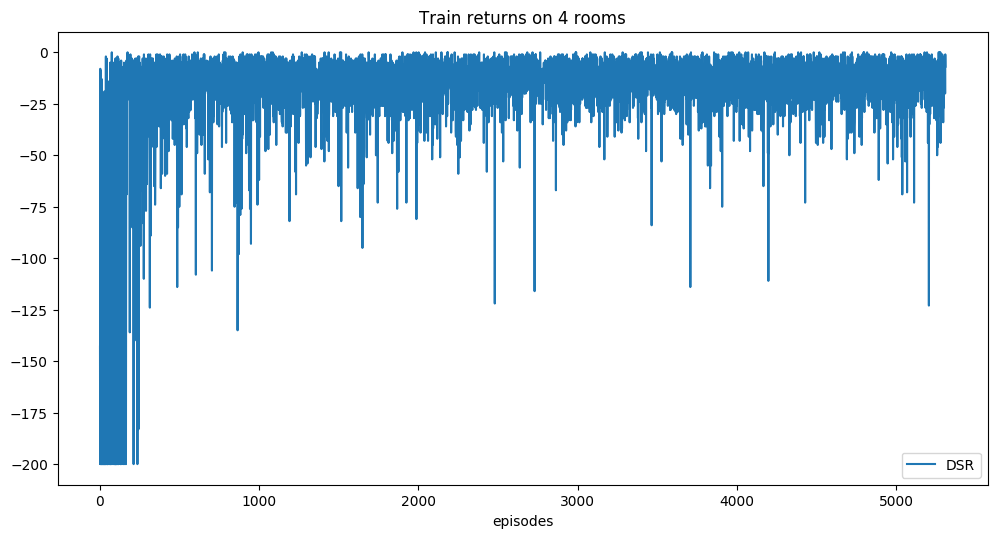

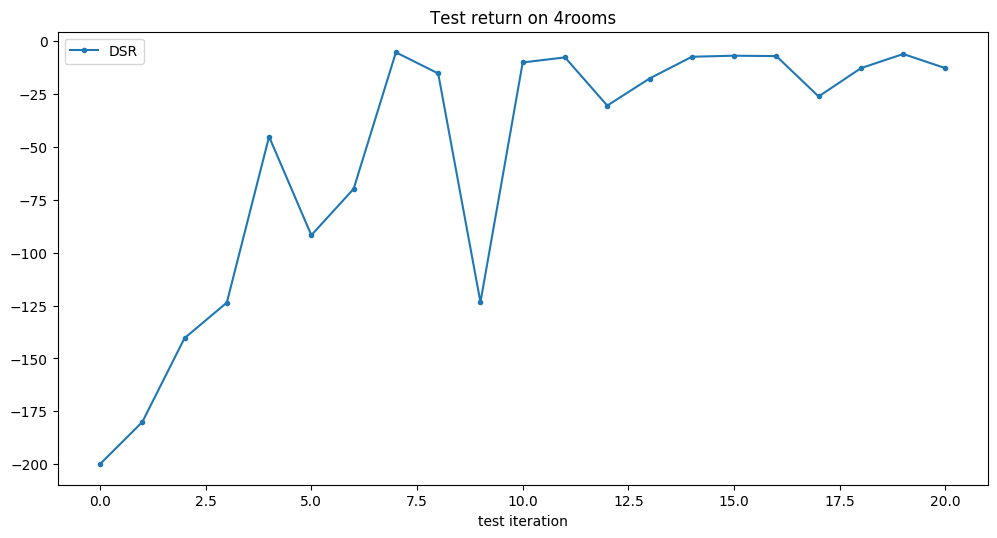

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6), dpi=100)
# plt.plot(train_dqn[:train_max], label='DQN')
plt.plot(train_dsr[:], label='DSR')
plt.title('Train returns on 4 rooms')
plt.xlabel('episodes'), plt.legend()
plt.show()

plt.figure(figsize=(12,6), dpi=100)
# plt.plot(test_dqn[:test_max], '.-', label='DQN')
plt.plot(test_dsr[:], '.-', label='DSR')
plt.title('Test return on 4rooms')
plt.xlabel('test iteration'), plt.legend()
plt.show()